# **French Noun Gender Classification in Word Embeddings: SHAP & LIME Analysis on a Perceptron Model**

# Step 1: Dataset Laoding (French Nouns Embeddings)

In [ ]:
!pip install gdown


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import gdown
import pandas as pd

# Define the French Nouns Embeddings files links and corresponding output file names
file_links = {
    #"camem_bert_base_embeddings": "1D7jbsNIinPTapETRzWimlPyU0y8tx49P",
    #"distilled_bert_base_cased": "1B_v8U57fw-fQ21PCDfUYDXgcxYRGNPIV",
    "flaubert_base_cased": "1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3",
    "flaubert_base_uncased": "155ScHgNyDdzkyHjV96eaT6yDFG3i-fke",
    "flaubert_large_uncased": "1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7",
    "flaubert_small_cased": "10xGIcEBfpbIdxC6kFDA4_qjxbEz_SJcT",
    #"mbert_base_cased": "1ULJOGhMS7bpXruv3sS1UJLyhDFAznXVE",
    #"mbert_base_uncased": "1MBTqcVxvwVPbnDBxqy7BPxx72ZOxIsw_",
    #"xlmr_r_large": "1J43o7gZslJemN8HMdSPzkhENMW52wFVX",
    #"xlm_roberta_base": "1MeYKcyXWpBNYhiYHMVHlwEgkWomyufxX"
}

# Dictionary to store dataframes
dataframes = {}

# Download files and load into dataframes
for name, file_id in file_links.items():
    output_file = f"{name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

    try:
        df = pd.read_csv(output_file)  # Try loading as CSV
    except Exception:
        try:
            df = pd.read_excel(output_file)  # Try loading as Excel
        except Exception:
            df = None  # If neither CSV nor Excel, set to None

    if df is not None:
        dataframes[name] = df
        print(f"Loaded {name} into dataframe with shape {df.shape}")
    else:
        print(f"Failed to load {name}, file format unknown.\n\n")


Downloading...
From (original): https://drive.google.com/uc?id=1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3
From (redirected): https://drive.google.com/uc?id=1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3&confirm=t&uuid=791a0867-9519-4991-acd8-e4113888705e
To: /content/flaubert_base_cased.csv
100%|██████████| 111M/111M [00:01<00:00, 63.8MB/s]


Loaded flaubert_base_cased into dataframe with shape (13481, 770)


Downloading...
From (original): https://drive.google.com/uc?id=155ScHgNyDdzkyHjV96eaT6yDFG3i-fke
From (redirected): https://drive.google.com/uc?id=155ScHgNyDdzkyHjV96eaT6yDFG3i-fke&confirm=t&uuid=4a96dd4f-f45c-418e-b32c-485ecb7bf58f
To: /content/flaubert_base_uncased.csv
100%|██████████| 137M/137M [00:01<00:00, 110MB/s]


Loaded flaubert_base_uncased into dataframe with shape (16504, 770)


Downloading...
From (original): https://drive.google.com/uc?id=1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7
From (redirected): https://drive.google.com/uc?id=1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7&confirm=t&uuid=ae56d4e9-dd94-491e-95d5-cffa14e664fb
To: /content/flaubert_large_uncased.csv
100%|██████████| 142M/142M [00:02<00:00, 69.7MB/s]


Loaded flaubert_large_uncased into dataframe with shape (13481, 1026)


Downloading...
From: https://drive.google.com/uc?id=10xGIcEBfpbIdxC6kFDA4_qjxbEz_SJcT
To: /content/flaubert_small_cased.csv
100%|██████████| 71.9M/71.9M [00:00<00:00, 81.0MB/s]


Loaded flaubert_small_cased into dataframe with shape (13481, 514)


# Step 2: Exploratory Data Analysis (EDA)

### 2.1 Dataset Head

In [3]:
# Display first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    display(df.head())  # Display first few rows
    print("=" * 80)



Dataset: flaubert_base_cased


Word         0         1         2         3         4         5         6  \
0   2D -0.003410 -2.942859  0.415028  0.284486  3.430643  0.548636 -0.653722   
1   3D -2.482999  0.537969 -0.967259  2.772490  0.571534 -1.665220  2.876226   
2    a -2.973347  0.117011 -0.665424  3.422699  1.083267 -1.953192  1.687308   
3   aa -3.831072  1.321632  2.532039 -2.400577 -0.922953  0.244394 -0.972499   
4  aba -1.225610 -0.145831  1.085824 -1.501620 -1.229859  1.462455  0.080811   

          7         8  ...       759       760       761       762       763  \
0 -1.674650 -2.424176  ...  0.392765  2.454749  3.391566  2.226161 -0.906475   
1  0.021730 -0.097758  ... -0.829459 -1.088251  1.335723 -0.214461  3.245200   
2 -1.215286 -1.035289  ...  0.095561 -0.922362  2.607434 -0.063993  1.063567   
3  1.564938  3.582069  ...  0.007120  1.909948 -0.614158  0.167209 -2.587294   
4 -1.534320  1.281341  ... -1.460710 -1.651668  1.739525 -0.320779 -1.115654   

        764       765       766       767  Gender  
0 -1.962978 -1.470658 -3.204519  0.193312       0  
1 -0.394857 -3.726279 -1.504977  3.011770       0  
2 -0.108695 -2.430608 -0.913492  2.560120       1  
3  0.638067 -1.564009 -1.981212  2.227041       1  
4 -2.525828 -0.230096 -2.663861  0.037247       1  

[5 rows x 770 columns]


Dataset: flaubert_base_uncased


Word         0         1         2         3         4         5         6  \
0   2D  2.069451 -0.196946 -0.590452 -0.294679 -0.126191 -1.256255  1.086165   
1   3D  0.987226  0.040561 -3.228347 -1.496991 -0.892471  0.200008  0.807684   
2    a  2.473813  0.240140 -0.998067 -0.393851 -2.040323 -0.410483 -1.244400   
3   aa  2.291961  3.423827  0.367711  0.765133 -0.857717  0.061944  1.942902   
4  aba  2.334413 -0.435559 -1.369356 -0.191412 -0.985617 -2.350507 -0.048486   

          7         8  ...       759       760       761       762       763  \
0 -1.670000  0.156369  ...  2.397997 -1.713811  0.751924 -2.147450  2.056054   
1  0.251609  0.261199  ...  1.673949 -2.785205  1.497909 -0.379167 -0.084702   
2 -0.335741 -0.137402  ...  0.913577 -1.004304  0.370865  0.365652  1.048086   
3 -2.305587 -3.050834  ...  2.021903 -2.888584  0.451671 -0.413568 -1.191705   
4 -0.749492 -1.948081  ...  0.953662 -1.434511  0.516787 -1.252479 -2.272759   

        764       765       766       767  Gender  
0  1.237907  1.331889  0.176321 -1.683485       0  
1  0.921880  1.755586  0.958315 -0.830866       0  
2  0.247753 -0.848047 -2.219805 -0.007960       1  
3  1.874531 -1.417624 -0.526818 -1.402899       1  
4  1.690874  2.827625 -0.663541  0.745179       1  

[5 rows x 770 columns]


Dataset: flaubert_large_uncased


Word         0         1         2         3          4          5  \
0   2D  2.349751 -6.180511  4.166406  9.794186  -6.292492   3.494754   
1   3D  1.858130 -5.378810  3.406198 -0.489852 -10.070462   2.676319   
2    a  8.071820 -1.721559  6.124100  8.248170  -3.370623  -0.764793   
3   aa  9.052979  2.525067  6.767379  5.078607  -2.846812  -1.025761   
4  aba  6.330437 -7.137898  0.668696 -2.687427   1.569957 -12.535857   

          6         7         8  ...       1015       1016      1017  \
0 -6.183371 -2.550185 -7.428347  ...  -2.155390   1.694553  4.313848   
1 -1.824387  0.815318 -3.428590  ...  -4.358321   6.512702  0.308002   
2  8.454268  2.946257  0.738389  ...  -3.591910  11.312113  1.324170   
3 -1.174740 -1.383830  2.114241  ... -11.937176   8.415228 -3.028422   
4 -8.297080 -7.934600  7.617362  ...  -6.060742   3.974230  8.077003   

        1018      1019       1020       1021       1022      1023  Gender  
0   0.650875  3.817881  -0.750011  13.997417  -8.864519  0.657211       0  
1   3.050550 -6.196063  -2.793685  11.858439 -11.934921 -2.199292       0  
2 -12.567185  4.586447  -3.293847   8.172892 -12.959602  1.821460       1  
3   1.840215 -4.270086  -0.049216   6.270343  -9.004971 -5.743093       1  
4   5.035424  5.153873 -17.188019  10.054430 -21.021303 -6.343835       1  

[5 rows x 1026 columns]


Dataset: flaubert_small_cased


Word         0         1         2         3         4         5         6  \
0   2D  5.531169 -8.963815  1.558321  3.143552 -5.372140 -0.173998 -1.124774   
1   3D  3.969330 -6.442654  1.451927  3.447789 -4.224667 -1.029559 -3.664734   
2    a  1.621909 -1.563334 -2.426637 -1.438067 -1.388713 -6.022452  0.529605   
3   aa  5.617860 -6.741740  2.519836 -3.914260  2.801902 -1.182261  4.435669   
4  aba  4.914317 -6.923123 -3.848756  5.110575 -2.516105 -4.938291  2.373579   

          7         8  ...       503       504       505       506       507  \
0  5.729995 -2.367392  ...  5.237968 -0.666145  2.222498 -2.044494 -0.161615   
1  4.911455  0.223901  ...  5.630971 -3.309551  0.908108 -0.559715 -0.491484   
2  5.798125 -1.673958  ...  5.492917 -1.754299 -2.933638 -3.008871 -6.436571   
3 -1.600745 -0.582458  ... -3.897178 -0.805951 -1.033487  1.398769 -6.305580   
4 -2.756590  2.567553  ...  0.679011 -2.095396 -4.307210 -0.017772 -6.159315   

        508        509        510       511  Gender  
0 -2.374312  -7.161043   2.704915 -4.613959       0  
1 -1.463476 -10.008976   2.005877 -2.951386       0  
2 -3.332312  -5.462241  -0.065580 -2.128897       1  
3 -0.108586   0.809530 -10.274058  2.984733       1  
4 -0.979261  -2.605049  -7.204095 -4.154817       1  

[5 rows x 514 columns]

### 2.2 Embedding Dimensions in Model

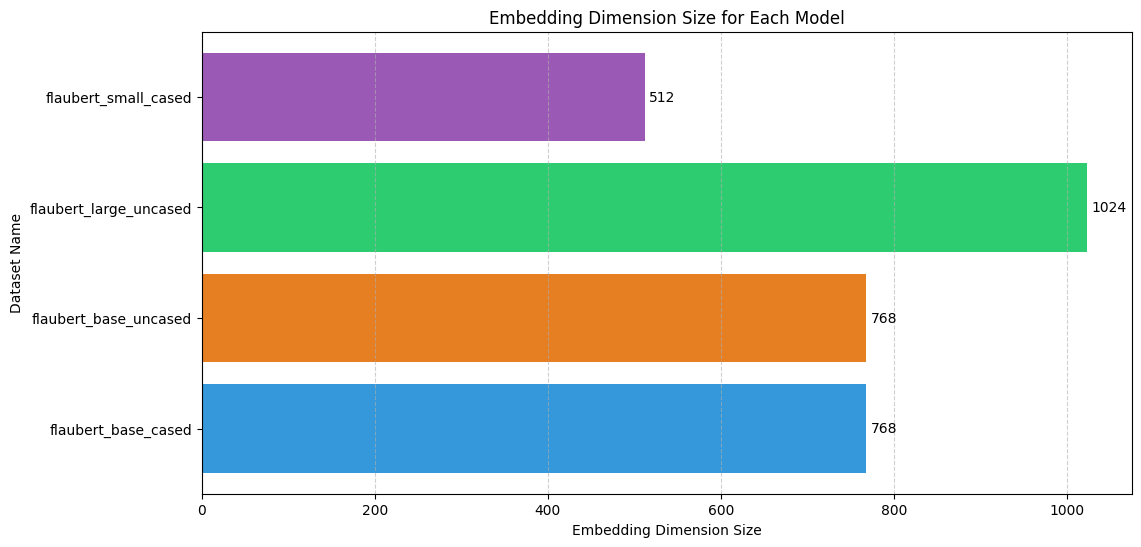

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define alternating colors
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]

# Function to plot embedding dimension length with alternating colors
def plot_embedding_dimensions(dataframes):
    dataset_names = []
    embedding_sizes = []

    # Extract embedding sizes
    for name, df in dataframes.items():
        # The number of embedding dimensions is the total columns minus the "Word" and "Gender" columns
        if "Gender" in df.columns and "Word" in df.columns:
            embedding_size = df.shape[1] - 2  # Subtract "Word" and "Gender" columns
        else:
            embedding_size = df.shape[1] - 1  # If "Gender" is missing, assume only "Word" is non-embedding

        dataset_names.append(name)
        embedding_sizes.append(embedding_size)

    # Create horizontal bar chart
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    plt.figure(figsize=(12, 6))

    # Plot bars with alternating colors
    for i, (name, size) in enumerate(zip(dataset_names, embedding_sizes)):
        plt.barh(y_positions[i], size, color=bar_colors[i % len(bar_colors)])  # Alternate colors
        plt.text(size + 5, y_positions[i], str(size), va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Embedding Dimension Size")
    plt.ylabel("Dataset Name")
    plt.title("Embedding Dimension Size for Each Model")
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Call the function to plot embedding dimension lengths
plot_embedding_dimensions(dataframes)


### 2.4 Class Distribution and Balancing

Showing  French Nouns Original Gender Distribution:


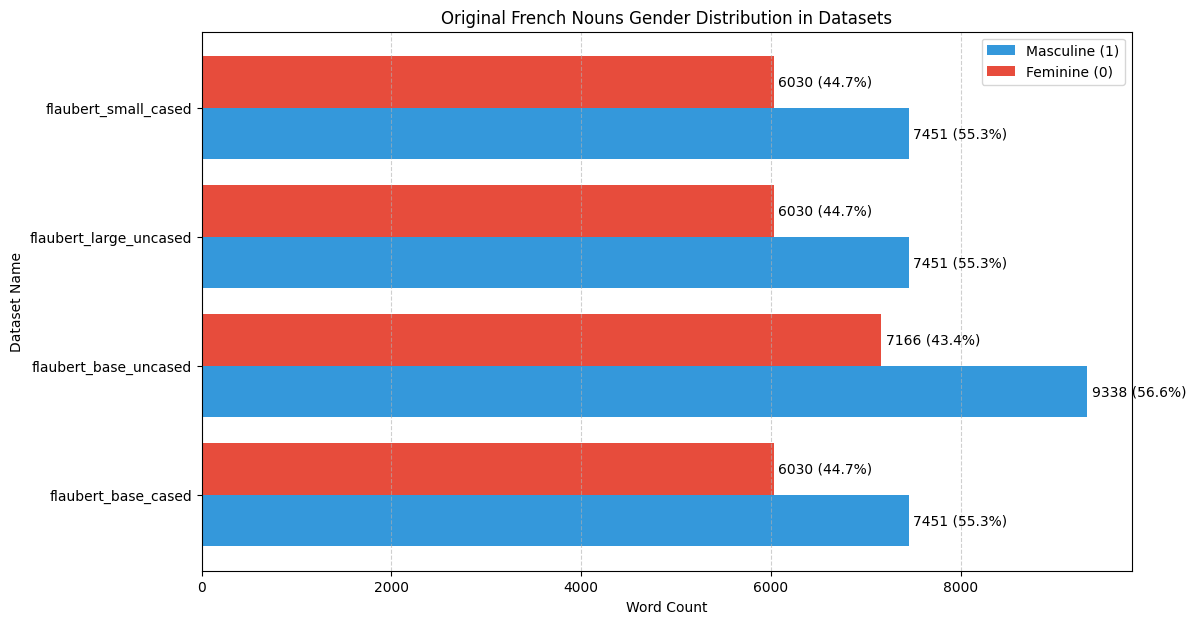

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot gender distribution as a horizontal bar chart
def plot_gender_distribution_bar_chart(dataframes, title="Gender Distribution in Datasets"):
    dataset_names = []
    masculine_counts = []
    feminine_counts = []
    total_counts = []

    # Extract gender counts for each dataset
    for name, df in dataframes.items():
        if "Gender" in df.columns:
            gender_counts = df["Gender"].value_counts()
            dataset_names.append(name)
            masculine_count = gender_counts.get(1, 0)  # Count Masculine (1)
            feminine_count = gender_counts.get(0, 0)  # Count Feminine (0)
            total_count = masculine_count + feminine_count  # Total words

            masculine_counts.append(masculine_count)
            feminine_counts.append(feminine_count)
            total_counts.append(total_count)

    # Convert counts to percentages
    masculine_percentages = [round((m / t) * 100, 1) if t > 0 else 0 for m, t in zip(masculine_counts, total_counts)]
    feminine_percentages = [round((f / t) * 100, 1) if t > 0 else 0 for f, t in zip(feminine_counts, total_counts)]

    # Bar width
    bar_width = 0.4
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    # Create figure
    plt.figure(figsize=(12, 7))

    # Plot bars for Masculine and Feminine
    plt.barh(y_positions - bar_width/2, masculine_counts, height=bar_width, label="Masculine (1)", color="#3498db")
    plt.barh(y_positions + bar_width/2, feminine_counts, height=bar_width, label="Feminine (0)", color="#e74c3c")

    # Add data labels (both count and percentage) on bars
    for i, (m_count, f_count, m_percent, f_percent) in enumerate(zip(masculine_counts, feminine_counts, masculine_percentages, feminine_percentages)):
        plt.text(m_count + 50, y_positions[i] - bar_width/2, f"{m_count} ({m_percent}%)", va="center", fontsize=10, color="black")
        plt.text(f_count + 50, y_positions[i] + bar_width/2, f"{f_count} ({f_percent}%)", va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Word Count")
    plt.ylabel("Dataset Name")
    plt.title(title)
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Show original distribution
print("Showing  French Nouns Original Gender Distribution:")
plot_gender_distribution_bar_chart(dataframes, title="Original French Nouns Gender Distribution in Datasets")


Showing French Nouns Gender Distribution After Undersampling:


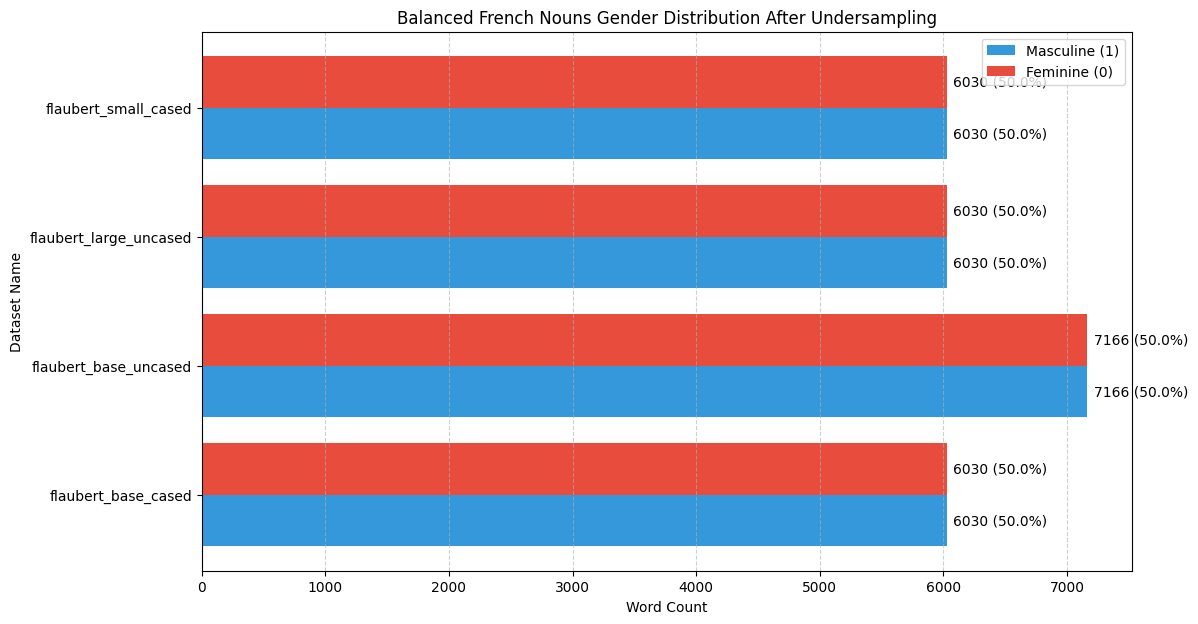

In [6]:
# Apply undersampling (reduce larger class to match smaller class)
balanced_dataframes = {}
for name, df in dataframes.items():
    if "Gender" in df.columns:
        masculine_df = df[df["Gender"] == 1]
        feminine_df = df[df["Gender"] == 0]

        # Find the smaller class size
        min_class_size = min(len(masculine_df), len(feminine_df))

        # Randomly sample from both classes
        masculine_sampled = masculine_df.sample(min_class_size, random_state=42)
        feminine_sampled = feminine_df.sample(min_class_size, random_state=42)

        # Concatenate and shuffle
        balanced_df = pd.concat([masculine_sampled, feminine_sampled]).sample(frac=1, random_state=42)

        # Store the balanced dataset
        balanced_dataframes[name] = balanced_df

# Show distribution after balancing
print("\nShowing French Nouns Gender Distribution After Undersampling:")
plot_gender_distribution_bar_chart(balanced_dataframes, title="Balanced French Nouns Gender Distribution After Undersampling")


# Step 3) Train a Simple Perceptron (Baseline on all Embeddings)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Set dataset size percentage for training
dataset_percentage = 99  # Change this to adjust dataset sampling size from each dataset

# Dictionary to store model performance
model_accuracies = {}

# Dictionary to store trained models and test data
trained_models = {}
test_data = {}

# Loop through each dataset and train a Perceptron model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nTraining Perceptron Model on {name} Dataset... ")

    # Ensure dataset has "Gender" and embeddings (excluding "Word" column)
    if "Gender" in df.columns and "Word" in df.columns:
        X = df.drop(columns=["Word", "Gender"]).values  # Feature vectors (embeddings)
        y = df["Gender"].values  # Target labels (0 = Feminine, 1 = Masculine)
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    # Select subset based on dataset_percentage
    sample_size = int((dataset_percentage / 100) * len(df))

    # Check if enough samples exist after sampling
    if sample_size < 2:
        print(f"{name} dataset is too small after sampling, skipping...")
        continue

    # Properly sample `sample_size` instances
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size / len(df), stratify=y, random_state=42)

    # Split into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

    # Standardize embeddings
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron model
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)

    # Store trained model and test data
    trained_models[name] = perceptron
    test_data[name] = X_test  # Store X_test for SHAP analysis

    # Predictions
    y_pred = perceptron.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy  # Store accuracy
    print(f"\nAccuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Feminine (0)", "Masculine (1)"]))


----------------------------------------------------------------------

Training Perceptron Model on flaubert_base_cased Dataset... 

Accuracy: 0.6854
               precision    recall  f1-score   support

 Feminine (0)       0.64      0.68      0.66      1194
Masculine (1)       0.73      0.69      0.71      1476

     accuracy                           0.69      2670
    macro avg       0.68      0.68      0.68      2670
 weighted avg       0.69      0.69      0.69      2670

----------------------------------------------------------------------

Training Perceptron Model on flaubert_base_uncased Dataset... 

Accuracy: 0.6007
               precision    recall  f1-score   support

 Feminine (0)       0.54      0.51      0.52      1419
Masculine (1)       0.64      0.67      0.66      1849

     accuracy                           0.60      3268
    macro avg       0.59      0.59      0.59      3268
 weighted avg       0.60      0.60      0.60      3268

------------------------------

### 3.1 Evaluate Performance of Perceptron (on all available embeddings)

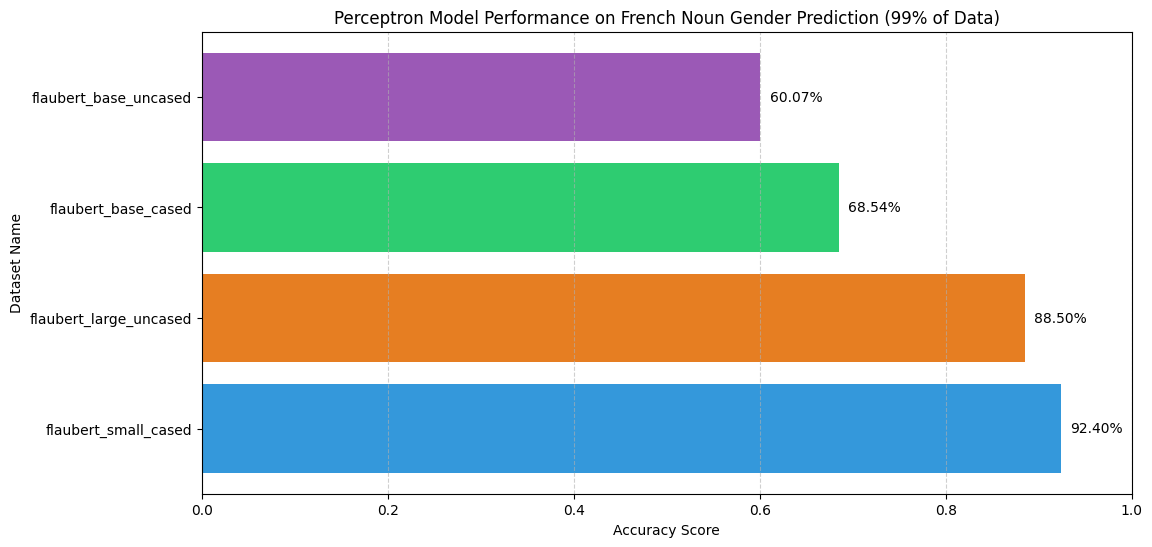

In [8]:
# Sort models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*sorted_models)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]
plt.barh(model_names, accuracies, color=[bar_colors[i % len(bar_colors)] for i in range(len(model_names))])

# Add data labels
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=10, color="black")

# Labels and Title
plt.xlabel("Accuracy Score")
plt.ylabel("Dataset Name")
plt.title(f"Perceptron Model Performance on French Noun Gender Prediction ({dataset_percentage}% of Data)")
plt.xlim(0, 1)  # Accuracy scale from 0 to 1
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Step 4) Applying SHAP to Understand Global Features Importance


--- Processing SHAP Feature Importance for camem_bert_base_embeddings ---


PermutationExplainer explainer: 1870it [58:20,  1.88s/it]                          



--- SHAP Feature Importance Plot for camem_bert_base_embeddings ---


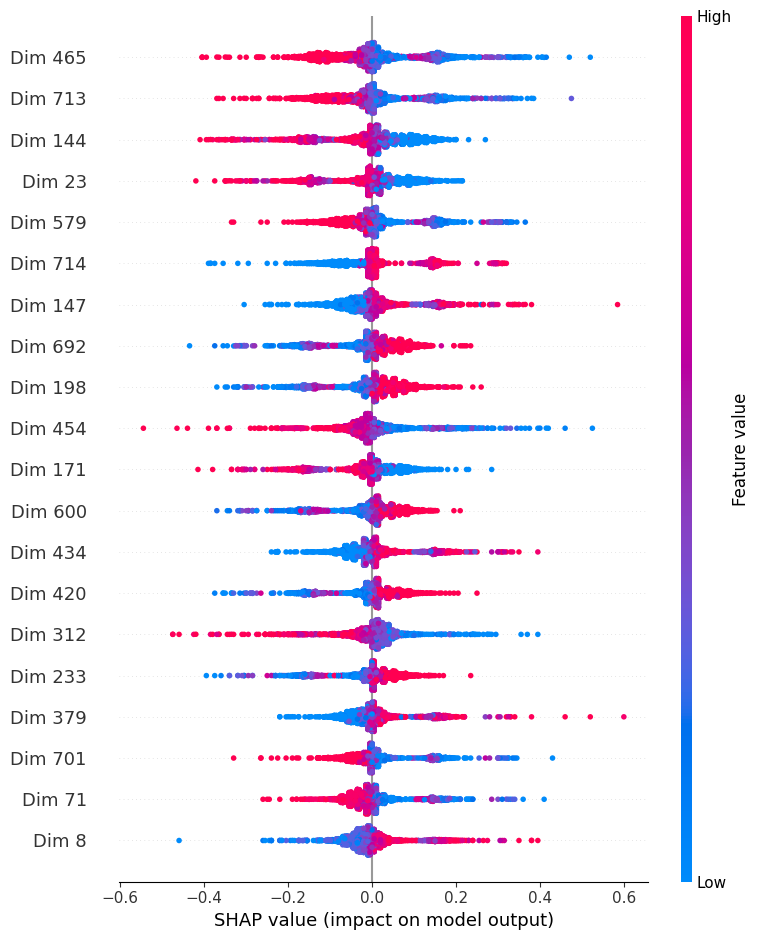


--- Processing SHAP Feature Importance for distilled_bert_base_cased ---


PermutationExplainer explainer: 858it [27:16,  1.92s/it]                         



--- SHAP Feature Importance Plot for distilled_bert_base_cased ---


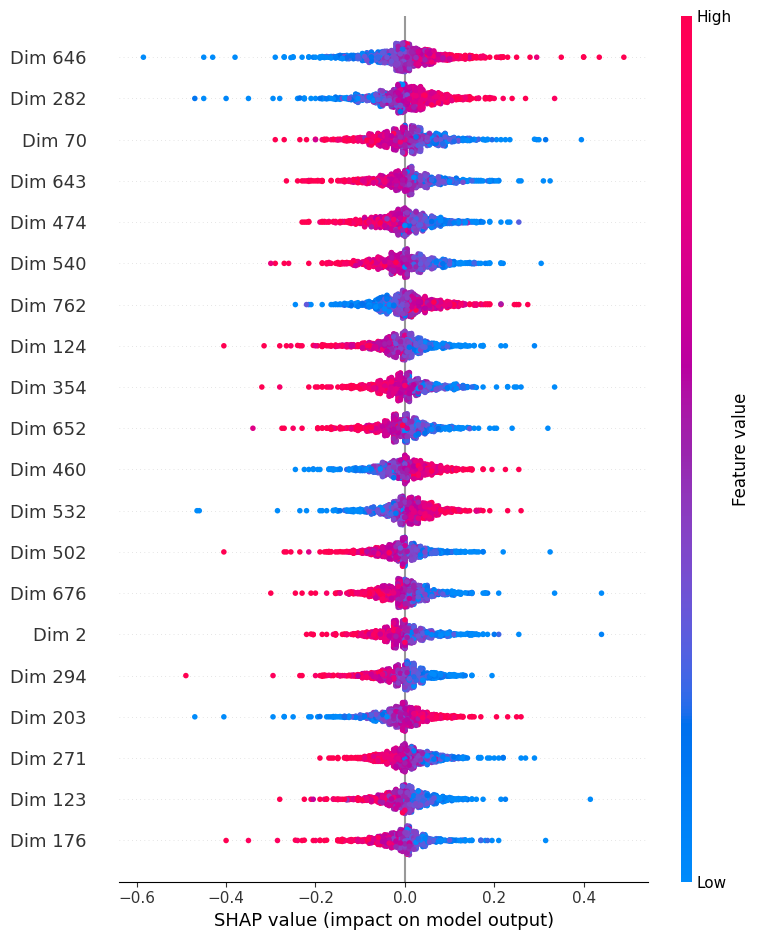


--- Processing SHAP Feature Importance for flaubert_base_cased ---


PermutationExplainer explainer: 2671it [1:31:23,  2.06s/it]                          



--- SHAP Feature Importance Plot for flaubert_base_cased ---


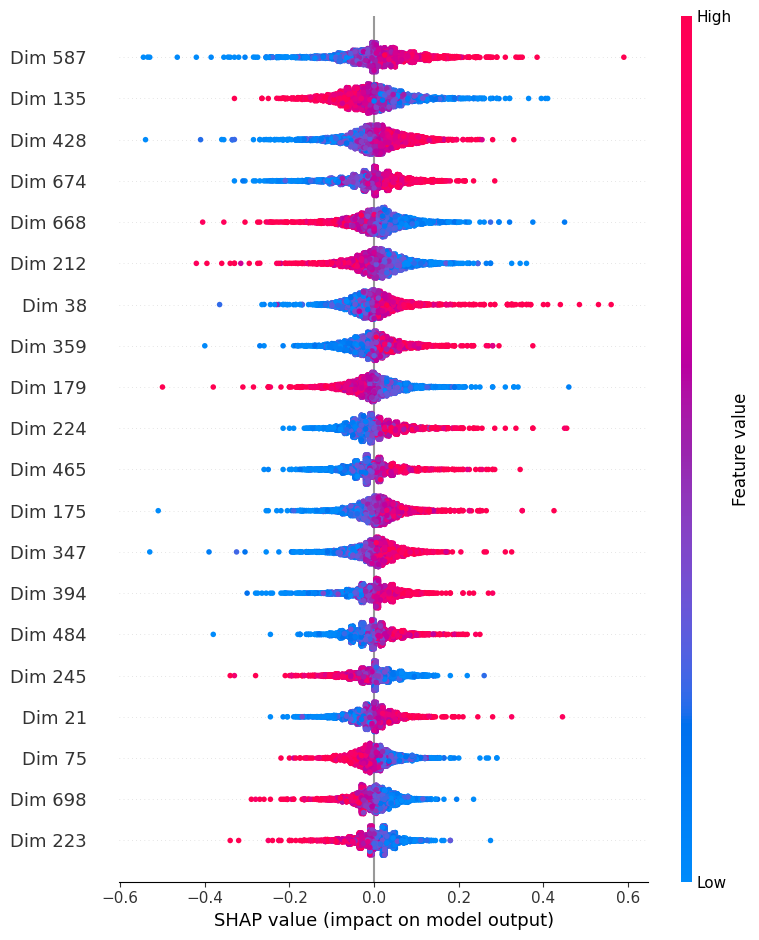


--- Processing SHAP Feature Importance for flaubert_base_uncased ---


PermutationExplainer explainer: 3269it [1:44:51,  1.93s/it]                             



--- SHAP Feature Importance Plot for flaubert_base_uncased ---


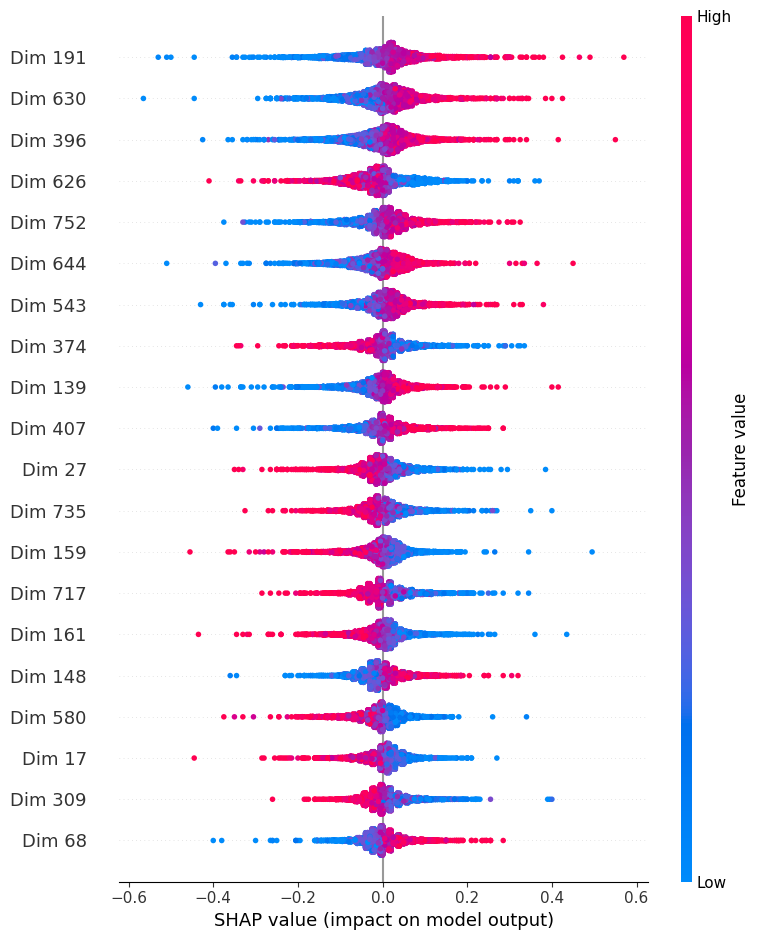


--- Processing SHAP Feature Importance for flaubert_large_uncased ---


PermutationExplainer explainer: 2671it [1:27:53,  1.98s/it]                          



--- SHAP Feature Importance Plot for flaubert_large_uncased ---


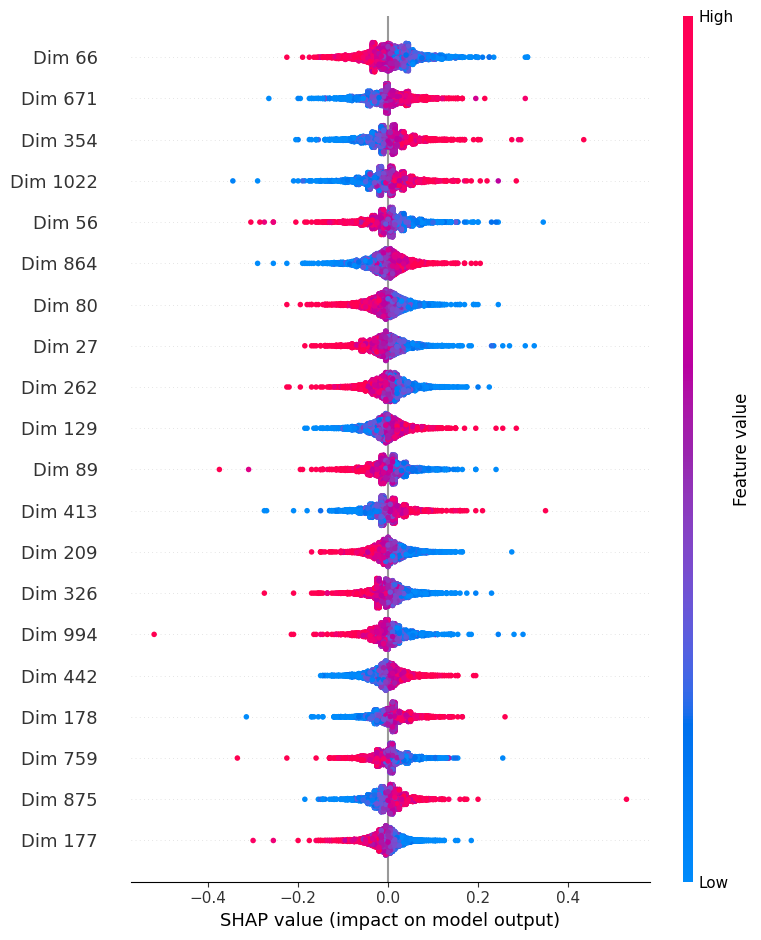


--- Processing SHAP Feature Importance for flaubert_small_cased ---


PermutationExplainer explainer: 2671it [21:48,  2.03it/s]                          



--- SHAP Feature Importance Plot for flaubert_small_cased ---


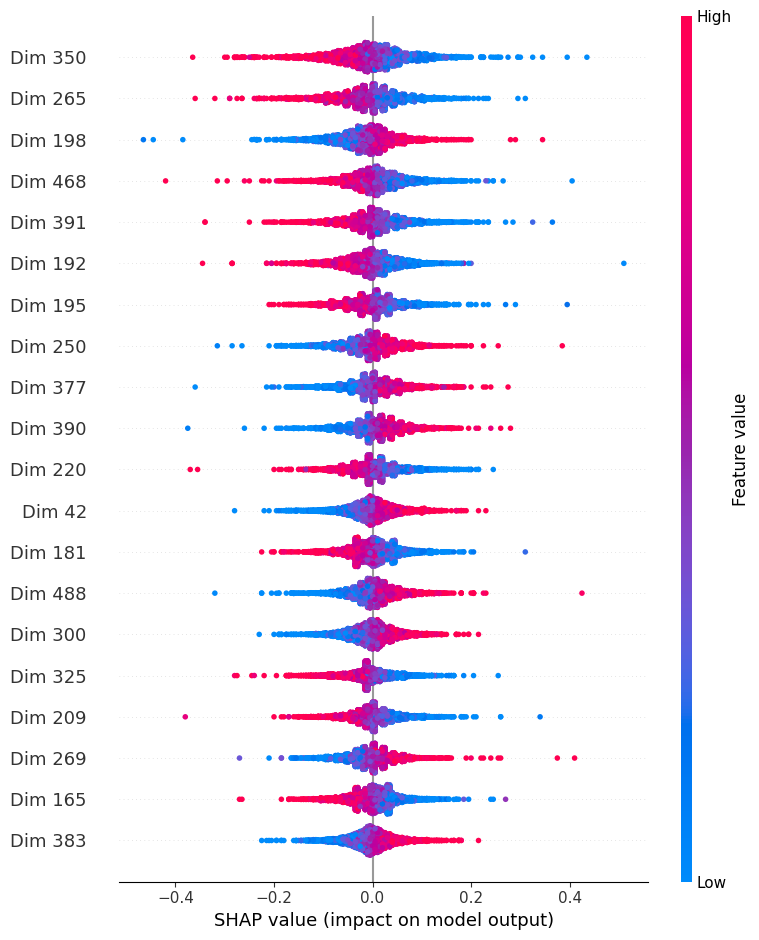


--- Processing SHAP Feature Importance for mbert_base_cased ---


PermutationExplainer explainer: 858it [15:57,  1.13s/it]                         



--- SHAP Feature Importance Plot for mbert_base_cased ---


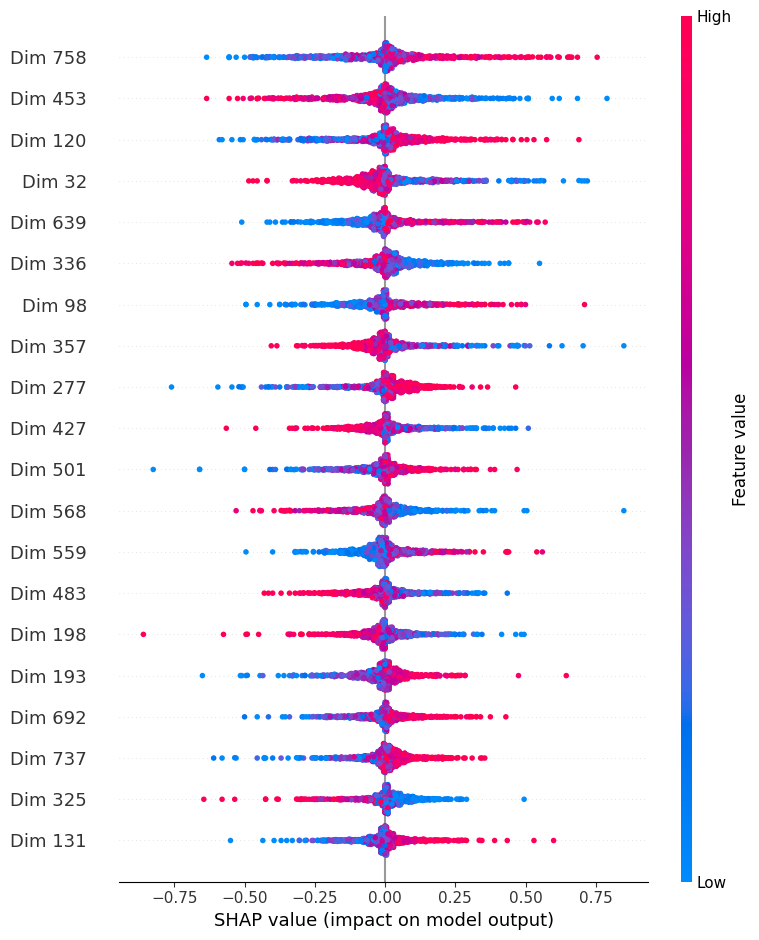


--- Processing SHAP Feature Importance for mbert_base_uncased ---


PermutationExplainer explainer: 1337it [24:44,  1.12s/it]                          



--- SHAP Feature Importance Plot for mbert_base_uncased ---


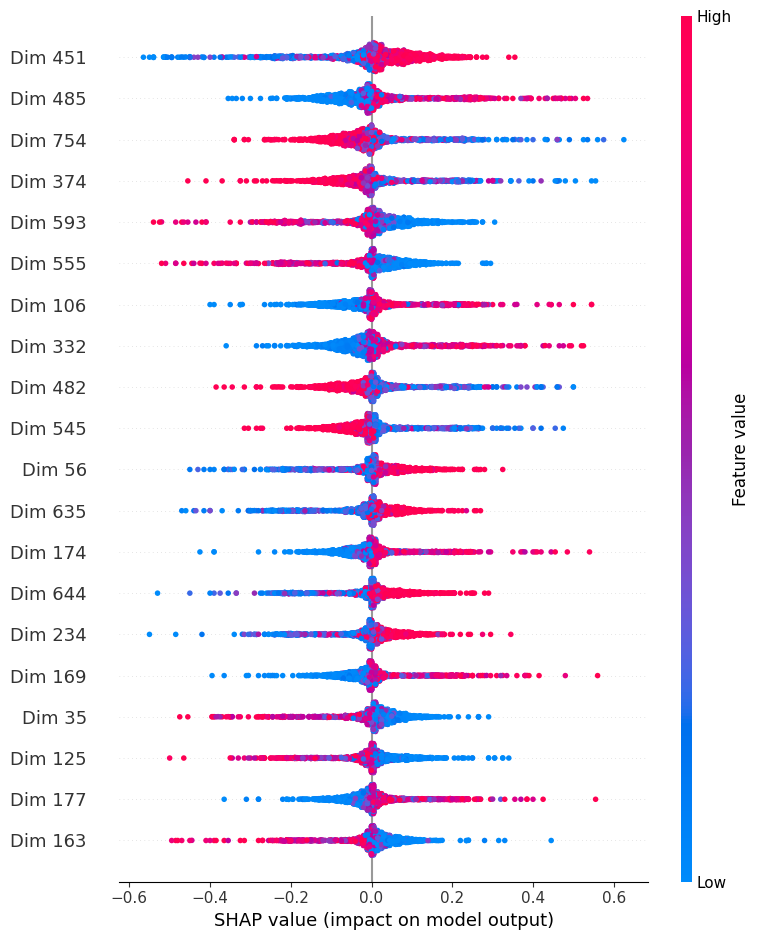


--- Processing SHAP Feature Importance for xlmr_r_large ---


PermutationExplainer explainer: 765it [25:01,  1.98s/it]                         



--- SHAP Feature Importance Plot for xlmr_r_large ---


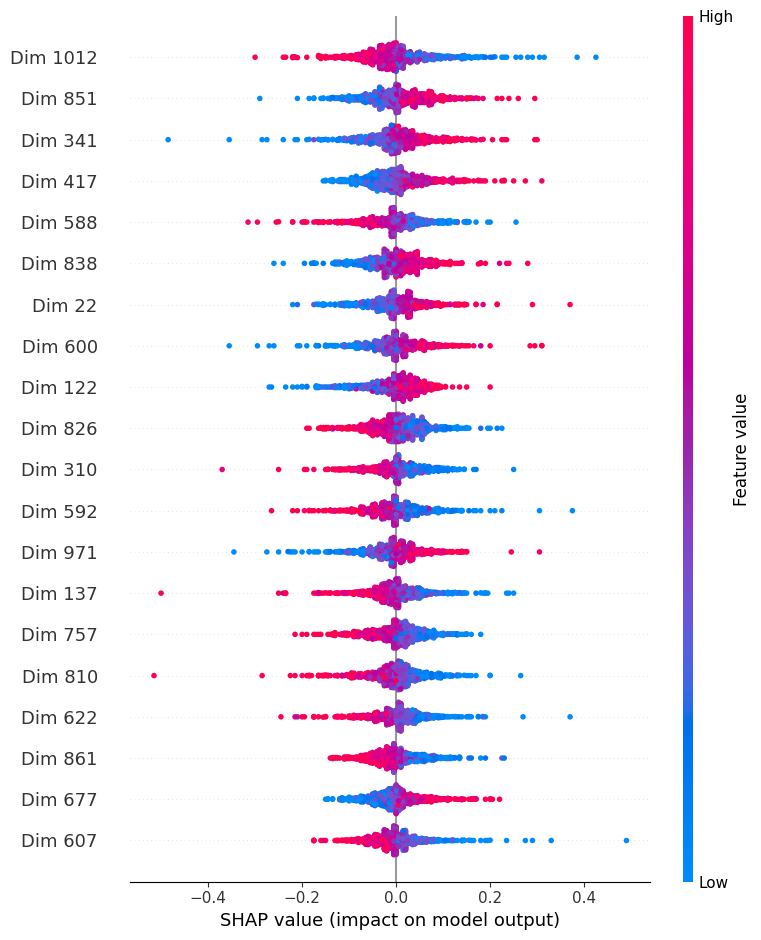


--- Processing SHAP Feature Importance for xlm_roberta_base ---


PermutationExplainer explainer: 765it [14:45,  1.17s/it]                         



--- SHAP Feature Importance Plot for xlm_roberta_base ---


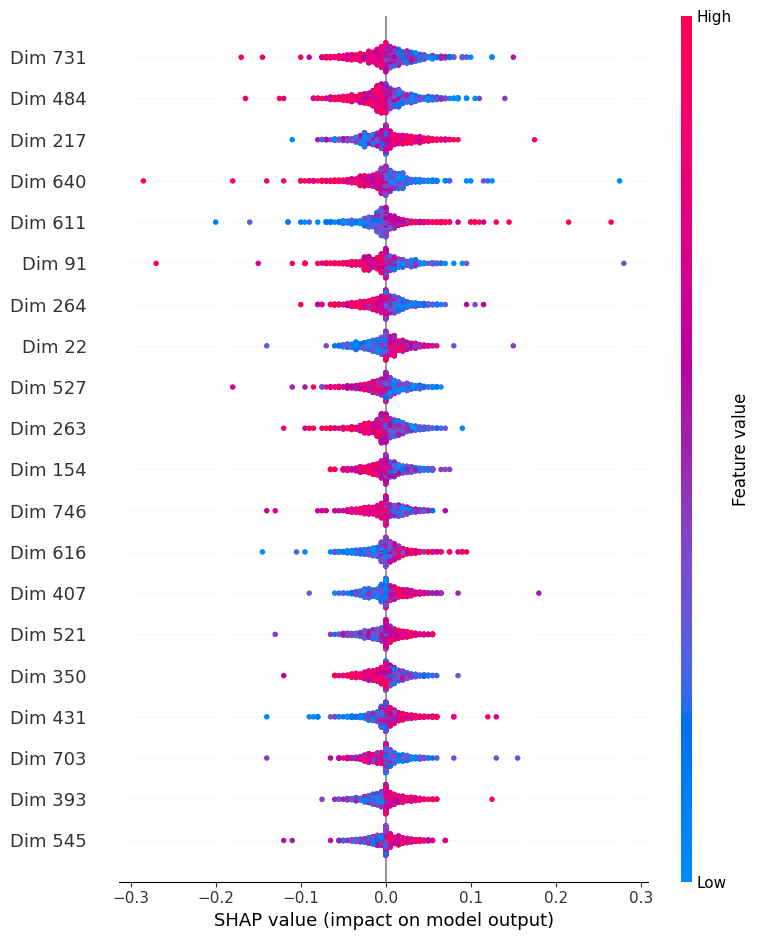

In [ ]:
import shap
import numpy as np

# Dictionary to store feature importance for each model
shap_feature_dict = {}

# Loop through trained models and apply SHAP
for name in trained_models.keys():
    print(f"\n--- Processing SHAP Feature Importance for {name} ---")

    # Retrieve stored X_test for the model
    X_test = test_data[name]  # Use the stored test dataset
    perceptron = trained_models[name]  # Use the already trained model

    # Get embedding dimension length dynamically
    embedding_dim = X_test.shape[1]

    # Apply SHAP
    explainer = shap.Explainer(perceptron.predict, X_test)
    shap_values = explainer(X_test, max_evals=embedding_dim * 2 + 1)

    # Compute mean absolute SHAP values per feature
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

    # Store feature importance for this model
    shap_feature_dict[name] = mean_abs_shap_values

    # Plot SHAP summary for this model
    print(f"\n--- SHAP Feature Importance Plot for {name} ---")
    shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])


### 4.1 Saving SHAP Feature Importance Results

In [ ]:
import pandas as pd
import numpy as np

# Find the maximum embedding dimension across all models
max_embedding_dim = max(len(v) for v in shap_feature_dict.values())

# Ensure all feature importance arrays have the same length by padding with NaN
for model in shap_feature_dict.keys():
    current_length = len(shap_feature_dict[model])
    if current_length < max_embedding_dim:
        shap_feature_dict[model] = np.pad(
            shap_feature_dict[model], (0, max_embedding_dim - current_length), constant_values=np.nan
        )

# Convert SHAP results into a single DataFrame
shap_feature_importance_all = pd.DataFrame(shap_feature_dict)

# Add feature column names
shap_feature_importance_all.insert(0, "Feature", [f"Dim {i}" for i in range(max_embedding_dim)])

# Sort by highest importance (mean across all models)
shap_feature_importance_all["Mean Importance"] = shap_feature_importance_all.iloc[:, 1:].mean(axis=1)
shap_feature_importance_all = shap_feature_importance_all.sort_values(by="Mean Importance", ascending=False)

# Save to a single CSV file
csv_filename = "shap_feature_importance_all_models.csv"
shap_feature_importance_all.to_csv(csv_filename, index=False)
print(f"\n--- SHAP feature importance saved to {csv_filename} ---")

# Display the table
print("\n--- SHAP Feature Importance Table (Top 50 Features) ---")
display(shap_feature_importance_all.head(50))  # Show the top 50 most important features



--- SHAP feature importance saved to shap_feature_importance_all_models.csv ---

--- SHAP Feature Importance Table (Top 50 Features) ---


Feature  camem_bert_base_embeddings  distilled_bert_base_cased  \
1012  Dim 1012                         NaN                        NaN   
971    Dim 971                         NaN                        NaN   
453    Dim 453                    0.005313                   0.013851   
934    Dim 934                         NaN                        NaN   
198    Dim 198                    0.052400                   0.013961   
897    Dim 897                         NaN                        NaN   
838    Dim 838                         NaN                        NaN   
875    Dim 875                         NaN                        NaN   
873    Dim 873                         NaN                        NaN   
851    Dim 851                         NaN                        NaN   
840    Dim 840                         NaN                        NaN   
1022  Dim 1022                         NaN                        NaN   
789    Dim 789                         NaN                        NaN   
844    Dim 844                         NaN                        NaN   
826    Dim 826                         NaN                        NaN   
994    Dim 994                         NaN                        NaN   
958    Dim 958                         NaN                        NaN   
120    Dim 120                    0.011974                   0.022812   
644    Dim 644                    0.026009                   0.012299   
972    Dim 972                         NaN                        NaN   
758    Dim 758                    0.006415                   0.016517   
336    Dim 336                    0.012033                   0.023291   
804    Dim 804                         NaN                        NaN   
864    Dim 864                         NaN                        NaN   
855    Dim 855                         NaN                        NaN   
922    Dim 922                         NaN                        NaN   
762    Dim 762                    0.002566                   0.046453   
91      Dim 91                    0.040003                   0.015443   
871    Dim 871                         NaN                        NaN   
56      Dim 56                    0.004243                   0.011342   
919    Dim 919                         NaN                        NaN   
568    Dim 568                    0.008438                   0.024236   
810    Dim 810                         NaN                        NaN   
170    Dim 170                    0.014326                   0.023996   
600    Dim 600                    0.048347                   0.009667   
632    Dim 632                    0.012293                   0.033926   
282    Dim 282                    0.024706                   0.054189   
332    Dim 332                    0.016857                   0.013209   
465    Dim 465                    0.079690                   0.007713   
861    Dim 861                         NaN                        NaN   
470    Dim 470                    0.032245                   0.039102   
931    Dim 931                         NaN                        NaN   
782    Dim 782                         NaN                        NaN   
451    Dim 451                    0.015658                   0.027870   
859    Dim 859                         NaN                        NaN   
161    Dim 161                    0.030305                   0.019312   
848    Dim 848                         NaN                        NaN   
731    Dim 731                    0.013133                   0.018938   
866    Dim 866                         NaN                        NaN   
277    Dim 277                    0.026661                   0.005268   

      flaubert_base_cased  flaubert_base_uncased  flaubert_large_uncased  \
1012                  NaN                    NaN                0.017380   
971                   NaN                    NaN                0.018363   
453              0.021146               0.025093       

# Step 5) Retrain Perceptron Using Selected SHAP Dimensions

### 5.1 Select Top N% (1, 5, 10, 25, 50, 75, 100) Features from SHAP Importance

In [9]:
import pandas as pd
import numpy as np

# Load the SHAP feature importance results
shap_feature_importance_all = pd.read_csv("shap_feature_importance_all_models.csv")

# Dictionary to store selected feature sets for each model
top_features_dict = {}

# Define top SHAPE feature selection percentages
percentages = [1, 5, 10, 25, 50, 75, 100]

# Loop through each model's SHAP importance values
for model_name in shap_feature_importance_all.columns[1:-1]:  # Exclude 'Feature' and 'Mean Importance'
    print(f"\n--- Selecting Features for {model_name} ---")

    # Get the total number of features (dimensions)
    total_features = len(shap_feature_importance_all)

    # Sort feature importance values in descending order
    sorted_features = shap_feature_importance_all[["Feature", model_name]].sort_values(by=model_name, ascending=False)

    # Store top feature sets for different percentages
    top_features_dict[model_name] = {}

    for percent in percentages:
        num_features = int((percent / 100) * total_features)  # Compute top N features
        selected_features = sorted_features["Feature"].head(num_features).tolist()  # Extract top feature names
        top_features_dict[model_name][percent] = selected_features  # Store in dictionary

print("\n--- Feature Selection Completed ---")



--- Selecting Features for camem_bert_base_embeddings ---

--- Selecting Features for distilled_bert_base_cased ---

--- Selecting Features for flaubert_base_cased ---

--- Selecting Features for flaubert_base_uncased ---

--- Selecting Features for flaubert_large_uncased ---

--- Selecting Features for flaubert_small_cased ---

--- Selecting Features for mbert_base_cased ---

--- Selecting Features for mbert_base_uncased ---

--- Selecting Features for xlmr_r_large ---

--- Selecting Features for xlm_roberta_base ---

--- Feature Selection Completed ---


### 5.2 Retrain Perceptrons Using Top N% SHAP Features

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store new model performance
new_model_accuracies = {}

# Loop through each model and retrain using selected features
for model_name, feature_sets in top_features_dict.items():
    print(f"\n--- Retraining Perceptron for {model_name} ---")

    # Skip if we don't have a dataframe for this model
    if model_name not in dataframes:
        print(f"Skipping {model_name} (No dataframe found)")
        continue

    df = dataframes[model_name]

    # Ensure dataset has "Gender" and embeddings
    if "Gender" not in df.columns or "Word" not in df.columns:
        print(f"Skipping {model_name} (Missing required columns)")
        continue

    # Prepare features & target
    X_full = df.drop(columns=["Word", "Gender"])
    y = df["Gender"].values
    X_full.columns = X_full.columns.astype(str)

    for percent, selected_features in feature_sets.items():
        print(f"\n--- Training with Top {percent}% Features ---")

        # Safely parse SHAP feature names
        selected_columns = []
        for feat in selected_features:
            try:
                # Expecting "Dim N"
                idx = feat.split(" ")[1]
                if idx in X_full.columns:
                    selected_columns.append(idx)
                else:
                    print(f"  Warning: dimension '{idx}' not in dataframe columns; skipping it.")
            except Exception as e:
                print(f"  Warning: could not parse feature '{feat}': {e}")

        if not selected_columns:
            print(f"  No valid features found for Top {percent}%; skipping.")
            continue

        X_selected = X_full[selected_columns].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y,
            test_size=0.2,
            random_state=42,
            stratify=y
        )

        # Standardize embeddings
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train Perceptron model
        perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
        perceptron.fit(X_train, y_train)

        # Predictions & evaluation
        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        new_model_accuracies[(model_name, percent)] = accuracy

        print(f"Accuracy with Top {percent}% Features: {accuracy:.4f}")
        print(classification_report(
            y_test, y_pred,
            target_names=["Feminine (0)", "Masculine (1)"]
        ))

print("\n--- Perceptron Training Completed ---")



--- Retraining Perceptron for camem_bert_base_embeddings ---
Skipping camem_bert_base_embeddings (No dataframe found)

--- Retraining Perceptron for distilled_bert_base_cased ---
Skipping distilled_bert_base_cased (No dataframe found)

--- Retraining Perceptron for flaubert_base_cased ---

--- Training with Top 1% Features ---
Accuracy with Top 1% Features: 0.5454
               precision    recall  f1-score   support

 Feminine (0)       0.48      0.22      0.31      1206
Masculine (1)       0.56      0.81      0.66      1491

     accuracy                           0.55      2697
    macro avg       0.52      0.51      0.48      2697
 weighted avg       0.53      0.55      0.50      2697


--- Training with Top 5% Features ---
Accuracy with Top 5% Features: 0.5488
               precision    recall  f1-score   support

 Feminine (0)       0.50      0.55      0.52      1206
Masculine (1)       0.60      0.55      0.57      1491

     accuracy                           0.55      2697


# Step 7) LIME-Based Feature Selection & Model Training

## 7.1 Install & Import Required Libraries

In [ ]:
!pip install lime  # Install LIME if not already installed

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


### 7.2 Apply LIME to Identify Important Features

In [ ]:
# Set dataset percentage for word selection (for LIME)for computatoinal efficiency
word_percentages = [1]

# Dictionary to store LIME feature importance for each model and percentage
lime_feature_importance = {}

# Loop through each trained model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nApplying LIME for {name}...")

    # Ensure dataset has "Gender" and "Word" columns
    if "Gender" in df.columns and "Word" in df.columns:
        X_full = df.drop(columns=["Word", "Gender"])  # Feature embeddings
        y_full = df["Gender"]  # Labels (0 = Feminine, 1 = Masculine)
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    # Use stored test data and trained model from previous training
    X_test = test_data[name]
    perceptron = trained_models[name]

    for percent in word_percentages:
        num_samples = int((percent / 100) * len(df))
        # Ensure class balance when selecting words
        masculine_samples = df[df["Gender"] == 1].sample(num_samples // 2, random_state=42)
        feminine_samples = df[df["Gender"] == 0].sample(num_samples // 2, random_state=42)
        sampled_df = pd.concat([masculine_samples, feminine_samples]).sample(frac=1, random_state=42)

        X_sample = sampled_df.drop(columns=["Word", "Gender"]).values
        y_sample = sampled_df["Gender"].values

        # Define LIME explainer with feature names in the format "Dim i"
        explainer = lime.lime_tabular.LimeTabularExplainer(
            X_sample,
            feature_names=[f"Dim {i}" for i in range(X_sample.shape[1])],
            class_names=["Feminine", "Masculine"],
            mode="classification"
        )

        # Define a wrapper function for Perceptron that returns a probability-like output
        def perceptron_predict(X):
            scores = perceptron.decision_function(X)
            # Convert decision scores into a two-column output:
            # first column: indicator if score > 0, second: indicator if score <= 0.
            return np.column_stack([(scores > 0).astype(int), (scores <= 0).astype(int)])

        # Initialize feature importance array for this percentage sample
        feature_importance = np.zeros(X_sample.shape[1])

        # Explain each randomly selected instance in the sample using LIME
        for i in range(len(X_sample)):
            exp = explainer.explain_instance(X_sample[i], perceptron_predict, num_features=X_sample.shape[1])
            for feat, importance in exp.as_list():
                # Use regex to extract the number after "Dim"
                match = re.search(r"Dim\s*(\d+)", feat)
                if match:
                    dim_index = int(match.group(1))
                    if dim_index < X_sample.shape[1]:
                        feature_importance[dim_index] += abs(importance)
                    else:
                        print(f"Skipping feature '{feat}': index {dim_index} out of bounds for {X_sample.shape[1]} dimensions.")
                else:
                    print(f"Skipping invalid feature: {feat}")

        # Normalize aggregated importance by the number of instances explained
        feature_importance /= len(X_sample)
        lime_feature_importance[(name, percent)] = feature_importance


print("\nLIME feature importance has been computed and stored in memory.")

----------------------------------------------------------------------

Applying LIME for camem_bert_base_embeddings...
----------------------------------------------------------------------

Applying LIME for distilled_bert_base_cased...
----------------------------------------------------------------------

Applying LIME for flaubert_base_cased...
----------------------------------------------------------------------

Applying LIME for flaubert_base_uncased...
----------------------------------------------------------------------

Applying LIME for flaubert_large_uncased...
----------------------------------------------------------------------

Applying LIME for flaubert_small_cased...
----------------------------------------------------------------------

Applying LIME for mbert_base_cased...
----------------------------------------------------------------------

Applying LIME for mbert_base_uncased...
----------------------------------------------------------------------

Applying 

Save LIME Feature Imoprtance

In [ ]:
# Find the max embedding dimension across models (since some models may have 768, others 1024)
max_dim = max([len(v) for v in lime_feature_importance.values()])

# Create a DataFrame with proper alignment
lime_feature_importance_df = pd.DataFrame(index=[f"Dim {i}" for i in range(max_dim)])

# Populate the DataFrame with LIME results
for (name, percent), feature_importance in lime_feature_importance.items():
    # Ensure feature importance array has the correct length by padding with zeros if necessary
    padded_feature_importance = np.zeros(max_dim)
    padded_feature_importance[:len(feature_importance)] = feature_importance  # Fill available values
    lime_feature_importance_df[(name, percent)] = padded_feature_importance

# Save the LIME feature importance data to a CSV file
lime_feature_importance_df.to_csv("lime_feature_importance_all_models.csv", index=True)

print("\nLIME feature importance saved to 'lime_feature_importance_all_models.csv'")
display(lime_feature_importance_df)


LIME feature importance saved to 'lime_feature_importance_all_models.csv'


(camem_bert_base_embeddings, 1)  (distilled_bert_base_cased, 1)  \
Dim 0                            0.013925                        0.005983   
Dim 1                            0.025022                        0.010357   
Dim 2                            0.013153                        0.017594   
Dim 3                            0.015289                        0.008120   
Dim 4                            0.011512                        0.008155   
...                                   ...                             ...   
Dim 1019                         0.000000                        0.000000   
Dim 1020                         0.000000                        0.000000   
Dim 1021                         0.000000                        0.000000   
Dim 1022                         0.000000                        0.000000   
Dim 1023                         0.000000                        0.000000   

          (flaubert_base_cased, 1)  (flaubert_base_uncased, 1)  \
Dim 0                     0.012370                    0.019074   
Dim 1                     0.015995                    0.013978   
Dim 2                     0.027113                    0.021994   
Dim 3                     0.015632                    0.017206   
Dim 4                     0.015627                    0.019182   
...                            ...                         ...   
Dim 1019                  0.000000                    0.000000   
Dim 1020                  0.000000                    0.000000   
Dim 1021                  0.000000                    0.000000   
Dim 1022                  0.000000                    0.000000   
Dim 1023                  0.000000                    0.000000   

          (flaubert_large_uncased, 1)  (flaubert_small_cased, 1)  \
Dim 0                        0.011425                   0.012511   
Dim 1                        0.012045                   0.012298   
Dim 2                        0.010257                   0.025812   
Dim 3                        0.012873                   0.021776   
Dim 4                        0.015790                   0.019761   
...                               ...                        ...   
Dim 1019                     0.011327                   0.000000   
Dim 1020                     0.015120                   0.000000   
Dim 1021                     0.012012                   0.000000   
Dim 1022                     0.053458                   0.000000   
Dim 1023                     0.011396                   0.000000   

          (mbert_base_cased, 1)  (mbert_base_uncased, 1)  (xlmr_r_large, 1)  \
Dim 0                       0.0                 0.016796           0.000084   
Dim 1                       0.0                 0.016507           0.000091   
Dim 2                       0.0                 0.013349           0.000093   
Dim 3                       0.0                 0.012940           0.000062   
Dim 4                       0.0                 0.011371           0.000088   
...                         ...                      ...                ...   
Dim 1019                    0.0                 0.000000           0.000109   
Dim 1020                    0.0                 0.000000           0.000061   
Dim 1021                    0.0                 0.000000           0.000101   
Dim 1022                    0.0                 0.000000           0.000125   
Dim 1023                    0.0                 0.000000           0.000067   

          (xlm_roberta_base, 1)  
Dim 0                       0.0  
Dim 1                       0.0  
Dim 2                       0.0  
Dim 3                       0.0  
Dim 4                       0.0  
...                         ...  
Dim 1019                    0.0  
Dim 1020                    0.0  
Dim 1021                    0.0  
Dim 1022                    0.0  
Dim 1023                    0.0  

[1024 rows x 10 columns]

### 7.3 Select Top N% Important Features & Retrain Perceptron

In [11]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# 1) User‐specified percentages
feature_selection_percentages = [1, 5, 10, 25, 50, 75, 100]

# 2) Load LIME importances
lime_df = pd.read_csv("/content/lime_feature_importance_all_models.csv")
if 'Unnamed: 0' in lime_df.columns:
    lime_df = lime_df.drop(columns=['Unnamed: 0'])

# 3) Regex to parse columns like "('model_name', 1)"
col_re = re.compile(r"\('(?P<model>[^']+)',\s*(?P<pct>\d+)\)")

# 4) Container for results
lime_model_accuracies = {}

# 5) Loop through each model’s dataframe
for model_name, df in dataframes.items():
    print("\n" + "-"*60)
    print(f"Retraining Perceptron on LIME‐selected features for {model_name}")

    # 5a) Prepare X_full, y
    drop_cols = ["Gender"]
    if "Word" in df.columns:
        drop_cols.append("Word")
    X_full = df.drop(columns=drop_cols)
    y = df["Gender"].values

    # 5b) Find the “base” (smallest) LIME % for ranking
    available_pcts = []
    for col in lime_df.columns:
        m = col_re.match(col)
        if not m:
            continue
        if m.group("model") == model_name:
            available_pcts.append(int(m.group("pct")))
    if not available_pcts:
        print(f"  ✗ No LIME data for {model_name}, skipping.")
        continue

    base_pct = min(available_pcts)
    base_col = f"('{model_name}', {base_pct})"
    importances = lime_df[base_col].values

    # 5c) Align importances length with X_full width
    max_dim = min(len(importances), X_full.shape[1])
    X_base = X_full.iloc[:, :max_dim]
    imp = importances[:max_dim]

    # 6) For each target %, pick top‐k and retrain
    for pct in feature_selection_percentages:
        k = int((pct / 100) * max_dim)
        if k < 1:
            print(f"  • {pct}% → selects <1 feature; skipping.")
            continue

        # Top‐k feature indices
        top_idx = np.argsort(imp)[-k:]
        selected_cols = X_base.columns[top_idx].tolist()
        X_sel = X_base[selected_cols].values

        # Train‐test split
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_sel, y,
            test_size=0.2,
            stratify=y,
            random_state=42
        )

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)

        # Train Perceptron
        clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
        clf.fit(X_tr, y_tr)

        # Evaluate
        y_pred = clf.predict(X_te)
        acc = accuracy_score(y_te, y_pred)
        lime_model_accuracies[(model_name, pct)] = acc

        print(f"  • LIME Top {pct}% ({k} dims): acc={acc:.4f}")
        print(classification_report(
            y_te, y_pred,
            target_names=["Feminine (0)", "Masculine (1)"]
        ))

print("\nAll retraining done. Results in `lime_model_accuracies`.")



------------------------------------------------------------
Retraining Perceptron on LIME‐selected features for flaubert_base_cased
  • LIME Top 1% (7 dims): acc=0.5006
               precision    recall  f1-score   support

 Feminine (0)       0.42      0.29      0.34      1206
Masculine (1)       0.54      0.67      0.60      1491

     accuracy                           0.50      2697
    macro avg       0.48      0.48      0.47      2697
 weighted avg       0.48      0.50      0.48      2697

  • LIME Top 5% (38 dims): acc=0.5091
               precision    recall  f1-score   support

 Feminine (0)       0.45      0.49      0.47      1206
Masculine (1)       0.56      0.52      0.54      1491

     accuracy                           0.51      2697
    macro avg       0.51      0.51      0.51      2697
 weighted avg       0.51      0.51      0.51      2697

  • LIME Top 10% (76 dims): acc=0.5706
               precision    recall  f1-score   support

 Feminine (0)       0.52      

# 8) Classification Accuracy Comparison: Baseline vs SHAP vs LIME vs Ekaterina

Top N% to test: 1, 5, 10, 25, 50, 75, 100 (Baseline)

In [12]:
import pandas as pd, pickle, numpy as np
from IPython.display import display

# 1. Load Ekaterina’s pickle & average 5‐fold Perceptron scores
EKA_ACC_PATH = "/content/gender_noun_accs.pickle"
with open(EKA_ACC_PATH, "rb") as f:
    ek_raw = pickle.load(f)

model_map = {
    "flau_small_c": "flaubert_small_cased",
    "flau_base_c":  "flaubert_base_cased",
    "flau_base_u":  "flaubert_base_uncased",
    "flau_large_c": "flaubert_large_uncased",
}
thresholds = [1, 5, 10, 25, 50, 75, 100]    # Now includes 100 for baseline

eka_model_accuracies = {}
for short, pretty in model_map.items():
    for p in thresholds:
        if p == 100:
            # Look for "All dims" key for 100%
            key = "All dims"
        else:
            key = f"Perc{p}"
        if key in ek_raw[short]:
            vals = ek_raw[short][key]
            eka_model_accuracies[(pretty, p)] = float(np.mean(vals))

# 2. Helper to fetch from any accuracy dict
def fetch(d, m, p=None):
    return d.get(m) if p is None else d.get((m, p))

# Assumes you already have in memory:
#   model_accuracies     (baseline, key=model)
#   new_model_accuracies (SHAP, key=(model,p))
#   lime_model_accuracies(LIME, key=(model,p))

# 3. Build empty table
all_models = sorted(model_map.values())
methods = ["SHAP","LIME","EKA"]
rows = [f"{p}%" for p in thresholds]
cols = pd.MultiIndex.from_product([all_models, methods])

acc_table = pd.DataFrame(index=rows, columns=cols, dtype=object)

for m in all_models:
    for p in thresholds:
        row = f"{p}%"
        # SHAP
        val = fetch(new_model_accuracies, m, p)
        acc_table.loc[row, (m, "SHAP")] = f"{val*100:.1f}" if val is not None else "–"
        # LIME
        val = fetch(lime_model_accuracies, m, p)
        acc_table.loc[row, (m, "LIME")] = f"{val*100:.1f}" if val is not None else "–"
        # EKA
        val = fetch(eka_model_accuracies, m, p)
        acc_table.loc[row, (m, "EKA")] = f"{val*100:.1f}" if val is not None else "–"


print("ACCURACY COMPARISON (rows=Top N%; cols=model×method, 100% is full baseline) ###")
display(acc_table)


ACCURACY COMPARISON (rows=Top N%; cols=model×method, 100% is full baseline) ###


flaubert_base_cased             flaubert_base_uncased              \
                    SHAP  LIME   EKA                  SHAP  LIME   EKA   
1%                  54.5  50.1  57.4                  54.5  48.2  54.7   
5%                  54.9  50.9  62.4                  55.6  53.9  57.1   
10%                 59.2  57.1  65.0                  55.0  52.7  58.7   
25%                 68.8  60.0  66.7                  56.2  53.4  58.5   
50%                 72.6  70.1  66.2                  58.8  55.5  58.3   
75%                 69.0  71.7  64.4                  56.7  59.9  57.5   
100%                69.0  69.0  63.3                  56.7  56.7  56.7   

     flaubert_large_uncased             flaubert_small_cased              
                       SHAP  LIME   EKA                 SHAP  LIME   EKA  
1%                     57.9  57.6  76.5                 57.7  52.7  62.9  
5%                     73.1  70.8  84.6                 77.1  63.7  72.8  
10%                    77.4  79.0  87.4                 86.4  73.2  77.1  
25%                    88.3  87.7  89.3                 91.8  87.6  80.5  
50%                    89.2  90.6  89.2                 92.3  93.8  78.2  
75%                    90.3  91.9  88.8                 92.3  92.7  75.8  
100%                   89.5  89.5  87.9                 92.3  92.3  73.6

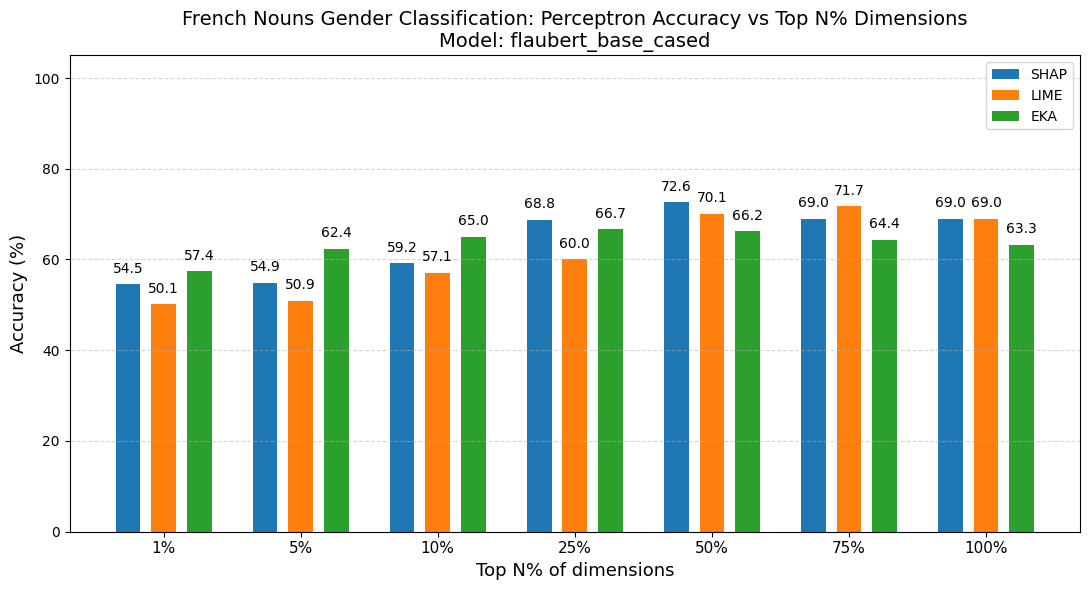

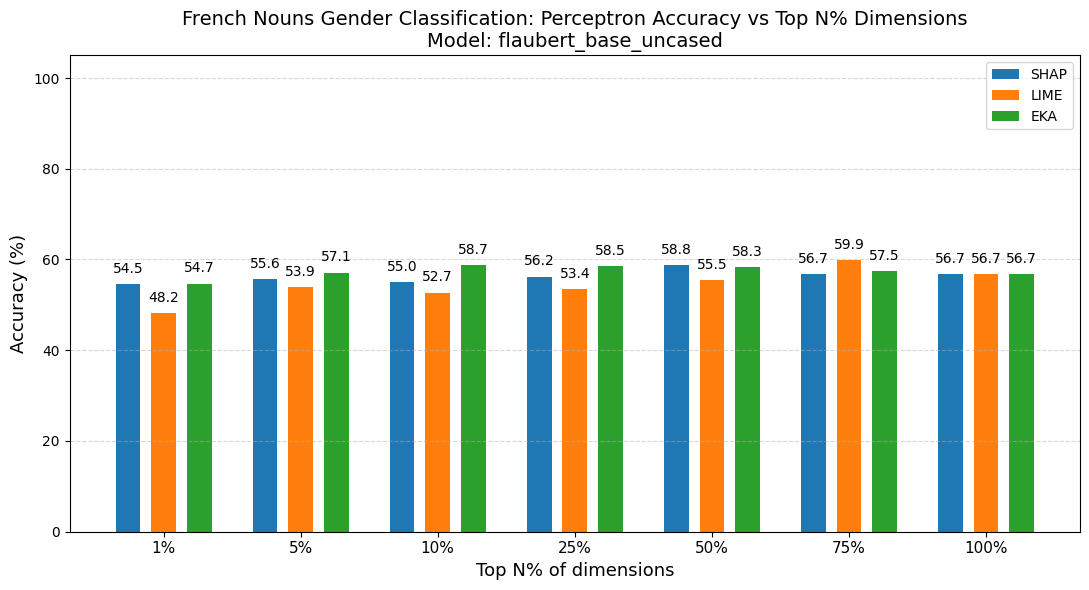

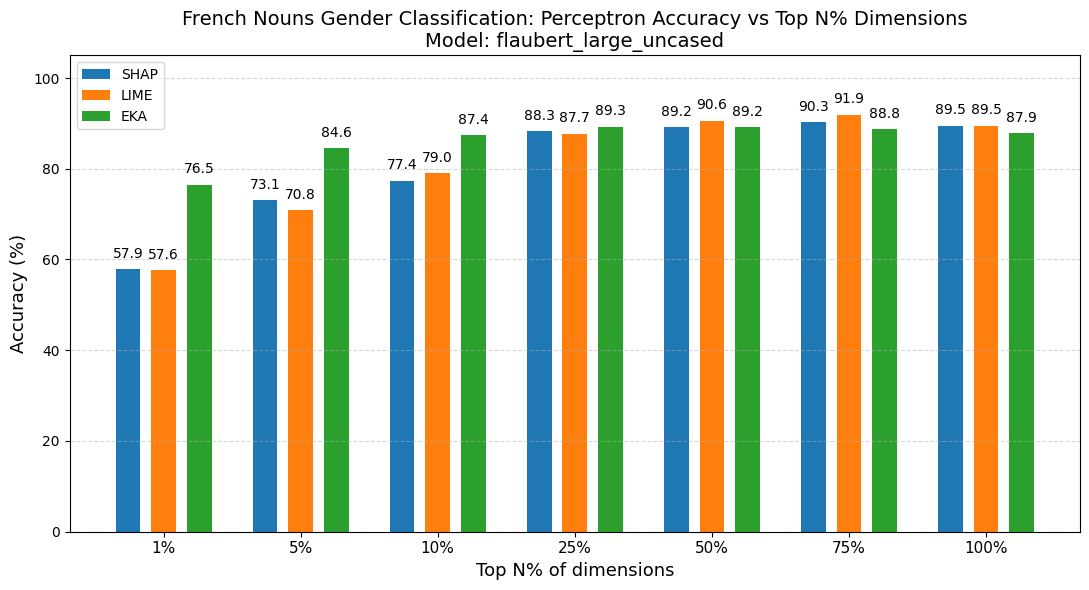

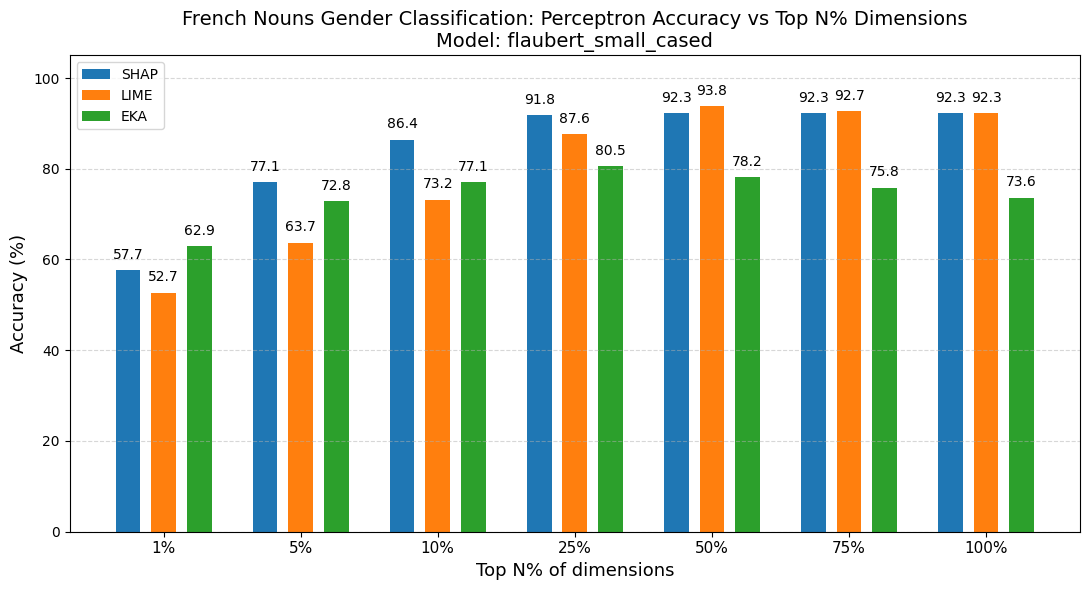

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Convert acc_table to percentage float for plotting
acc_numeric = acc_table.copy()
for col in acc_numeric.columns:
    acc_numeric[col] = acc_numeric[col].apply(lambda x: float(x) if x not in ["–", None, np.nan] else np.nan)
acc_numeric.index = [int(x.rstrip("%")) for x in acc_numeric.index]

bar_width = 0.18   # Narrower bars for more space between them
x = np.arange(len(acc_numeric.index))
bar_gap = 0.08     # Extra gap between bar groups

for model in all_models:
    fig, ax = plt.subplots(figsize=(11, 6))
    # Calculate actual positions with extra gap
    n_methods = len(methods)
    total_width = n_methods * bar_width + (n_methods-1)*bar_gap
    for i, method in enumerate(methods):
        col = (model, method)
        accs = acc_numeric[col].values
        bar_pos = x - (total_width/2) + i*(bar_width + bar_gap) + bar_width/2
        bars = ax.bar(bar_pos, accs, width=bar_width, label=method)
        # Data labels: horizontal, 1 decimal, a little above the bar
        for rect in bars:
            height = rect.get_height()
            if not np.isnan(height):
                ax.annotate(f'{height:.1f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 6),  # More offset for clarity
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, rotation=0)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{k}%" for k in acc_numeric.index], fontsize=11)
    ax.set_xlabel("Top N% of dimensions", fontsize=13)
    ax.set_ylabel("Accuracy (%)", fontsize=13)
    ax.set_title(f"French Nouns Gender Classification: Perceptron Accuracy vs Top N% Dimensions\nModel: {model}", fontsize=14)
    ax.set_ylim(0, 105)
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


# 9) Shared Dimensions: LIME vs SHAP vs Ekaterina

In [14]:
# -------------------------------------------------------------
#  Compare LIME, SHAP and Ekaterina’s 5-fold attribution results
# -------------------------------------------------------------
import pandas as pd, math, pickle, re
from IPython.display import display

# ---------- 0.  PATHS
LIME_PATH = "/content/lime_feature_importance_all_models.csv"
SHAP_PATH = "/content/shap_feature_importance_all_models.csv"
EKA_PATH  = "/content/gender_noun_dims.pickle"

# ---------- 1.  LOAD LIME & SHAP CSVs ----------
lime = pd.read_csv(LIME_PATH)
shap = pd.read_csv(SHAP_PATH)

# first column →  Feature
for df in (lime, shap):
    if "Feature" not in df.columns:
        df.rename(columns={df.columns[0]: "Feature"}, inplace=True)
    df["Feature"] = df["Feature"].astype(str).str.strip()

# helper: find correct model column despite parentheses / tuple headers
def find_col(df, model_name):
    targ = re.sub(r"[^\w]", "", model_name.lower())
    for col in df.columns:
        txt = "".join(col) if isinstance(col, tuple) else str(col)
        if targ in re.sub(r"[^\w]", "", txt.lower()):
            return col
    raise KeyError(f"Column for “{model_name}” not found")

# ---------- 2.  LOAD Ekaterina ----------
with open(EKA_PATH, "rb") as f:
    ek_raw = pickle.load(f)

model_map = {                     # pretty ↔ key inside the pickle
    "flaubert_small_cased":   "flau_small_c",
    "flaubert_base_cased":    "flau_base_c",
    "flaubert_base_uncased":  "flau_base_u",
    "flaubert_large_uncased": "flau_large_c",   # she ran a *cased* large model
}
embed_size = {                   # true hidden sizes
    "flaubert_small_cased":   512,
    "flaubert_base_cased":    768,
    "flaubert_base_uncased":  768,
    "flaubert_large_uncased": 1024,
}
thresholds = [1, 5, 10, 25, 50, 75]

# ---------- 3.  BUILD Ekaterina’s *union per percentage* ----------
ek_dims = {m: {p: set() for p in thresholds} for m in model_map}
for m_pretty, m_key in model_map.items():
    mdict = ek_raw[m_key]                      # e.g. {"Perc1":[fold1,…fold5], …}
    for p in thresholds:
        folds_here = mdict.get(f"Perc{p}", []) # list-of-lists (5 folds)
        ek_dims[m_pretty][p] = set().union(*folds_here)

# ---------- 4.  MAIN LOOP ----------
results = {}
for model in model_map:
    L_col = find_col(lime, model)
    S_col = find_col(shap, model)

    # rank LIME & SHAP once
    l_df = lime[["Feature", L_col]].copy()
    s_df = shap[["Feature", S_col]].copy()
    l_df["dim"] = l_df["Feature"].str.extract(r"(\d+)").astype(int)
    s_df["dim"] = s_df["Feature"].str.extract(r"(\d+)").astype(int)
    l_df["imp"] = pd.to_numeric(l_df[L_col], errors="coerce").fillna(0)
    s_df["imp"] = pd.to_numeric(s_df[S_col], errors="coerce").fillna(0)
    l_df = l_df.reindex(l_df["imp"].abs().sort_values(ascending=False).index)
    s_df = s_df.reindex(s_df["imp"].abs().sort_values(ascending=False).index)

    tot = embed_size[model]
    results[model] = {}
    for p in thresholds:
        k = math.ceil(tot * p / 100)           # top-k dims for this percentage
        L = set(l_df["dim"].iloc[:k])
        S = set(s_df["dim"].iloc[:k])
        E = ek_dims[model][p]                  # union of 5 folds, same p

        ALL =  L &  S & E
        LS  = (L & S) - ALL
        LE  = (L & E) - ALL
        SE  = (S & E) - ALL
        L0  =  L - (S | E)
        S0  =  S - (L | E)
        E0  =  E - (L | S)

        results[model][p] = {
            "Total dims": k,
            "Shared ALL": len(ALL),
            "LIME∩SHAP":  len(LS),
            "LIME∩EKA":   len(LE),
            "SHAP∩EKA":   len(SE),
            "LIME only":  len(L0),
            "SHAP only":  len(S0),
            "EKA only":   len(E0),
        }

# ---------- 5.  DISPLAY ----------
for m, tbl in results.items():
    df = pd.DataFrame.from_dict(tbl, orient="index")
    df.index.name = "Top %"
    print("-" * 40)
    print(f"{m}")
    print("-" * 40)
    display(df)


----------------------------------------
flaubert_small_cased
----------------------------------------


Total dims  Shared ALL  LIME∩SHAP  LIME∩EKA  SHAP∩EKA  LIME only  \
Top %                                                                     
1               6           0          4         0         0          2   
5              26           6         15         0         2          5   
10             52          16         29         0         2          7   
25            128          54         63         5         5          6   
50            256         167         78         3         8          8   
75            384         317         44        19        22          4   

       SHAP only  EKA only  
Top %                       
1              2         7  
5              3        25  
10             5        49  
25             6        94  
50             3       137  
75             1        92

----------------------------------------
flaubert_base_cased
----------------------------------------


Total dims  Shared ALL  LIME∩SHAP  LIME∩EKA  SHAP∩EKA  LIME only  \
Top %                                                                     
1               8           1          2         0         1          5   
5              39           6         21         0         1         12   
10             77          16         40         4         5         17   
25            192          72         87        14        12         19   
50            384         232        109        30        31         13   
75            576         496         24        54        54          2   

       SHAP only  EKA only  
Top %                       
1              4        11  
5             11        58  
10            16       103  
25            21       197  
50            12       234  
75             2       134

----------------------------------------
flaubert_base_uncased
----------------------------------------


Total dims  Shared ALL  LIME∩SHAP  LIME∩EKA  SHAP∩EKA  LIME only  \
Top %                                                                     
1               8           0          6         0         0          2   
5              39           5         24         0         2         10   
10             77          20         45         3         4          9   
25            192          88         82         9         6         13   
50            384         281         75        21        23          7   
75            576         510         13        53        52          0   

       SHAP only  EKA only  
Top %                       
1              2        14  
5              8        71  
10             8       116  
25            16       230  
50             5       260  
75             1       132

----------------------------------------
flaubert_large_uncased
----------------------------------------


Total dims  Shared ALL  LIME∩SHAP  LIME∩EKA  SHAP∩EKA  LIME only  \
Top %                                                                     
1              11           1          7         0         0          3   
5              52           5         32         1         1         14   
10            103          15         71         3         0         14   
25            256          86        148         4         9         18   
50            512         291        171        32        32         18   
75            768         601         83        74        76         10   

       SHAP only  EKA only  
Top %                       
1              3        12  
5             14        70  
10            17       126  
25            13       236  
50            18       274  
75             8       149


MODEL: flaubert_small_cased


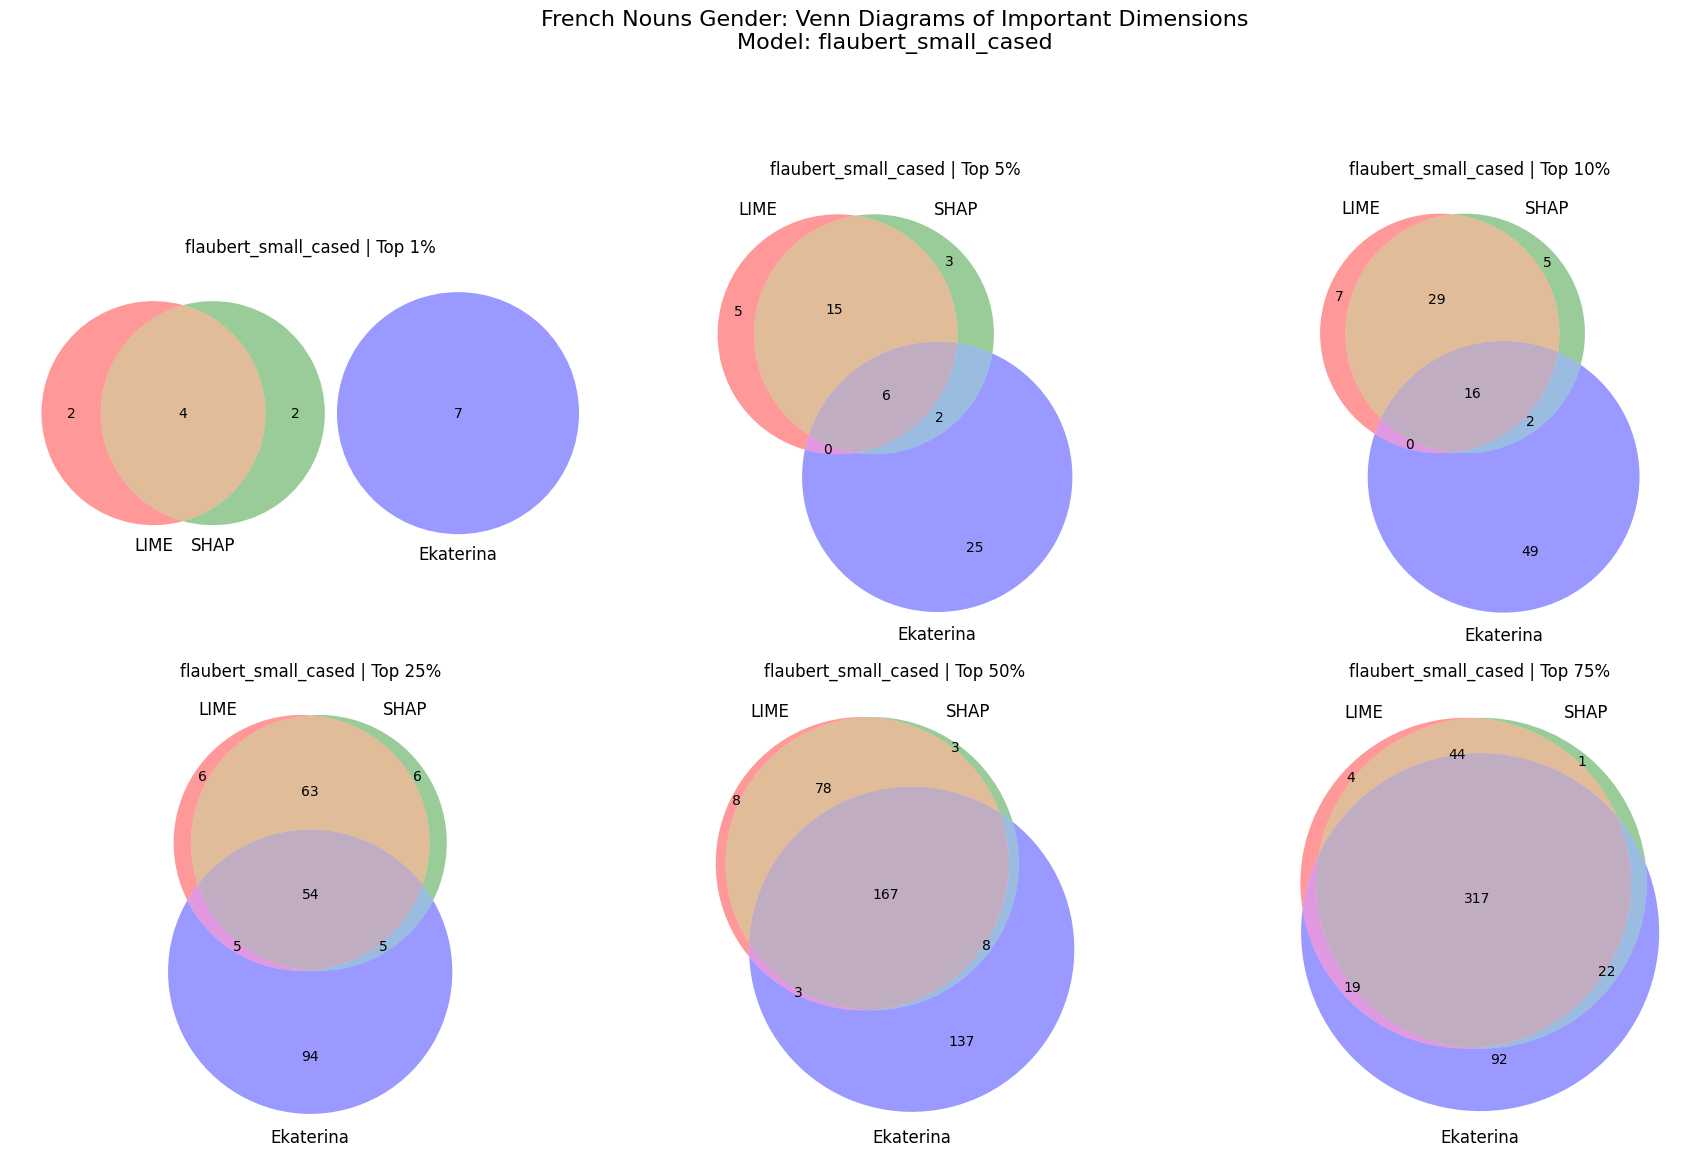


MODEL: flaubert_base_cased


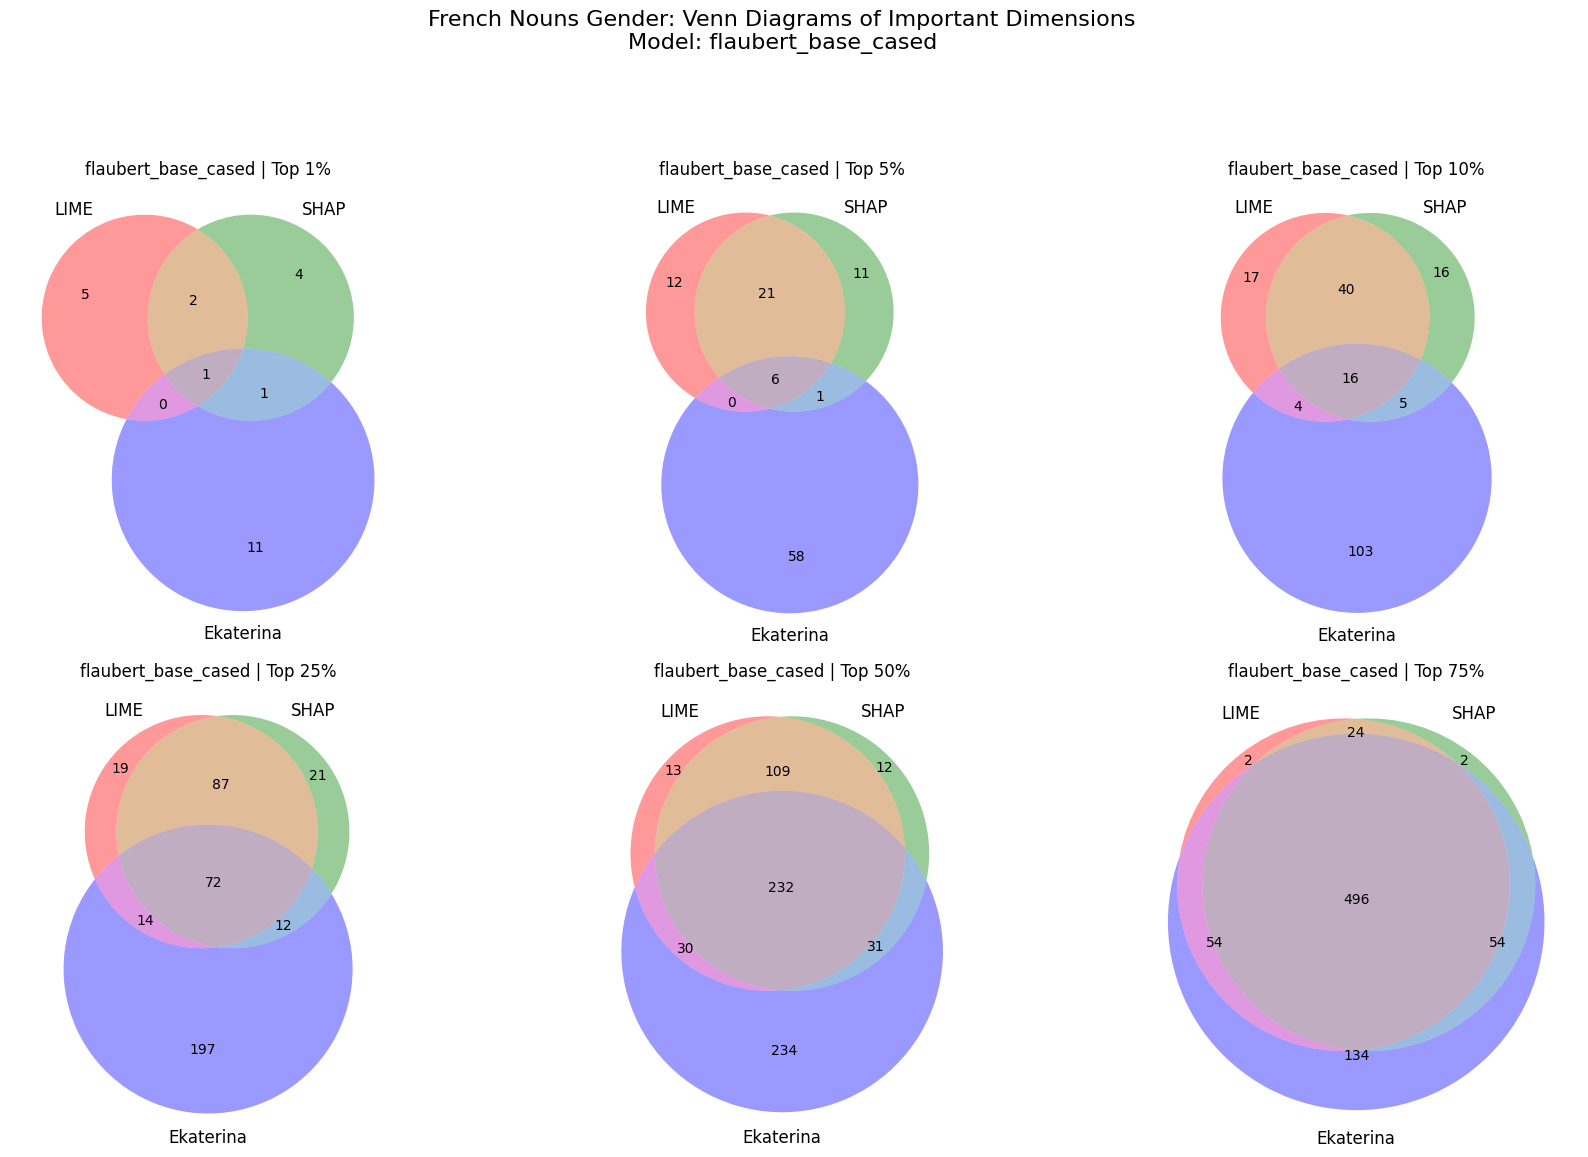


MODEL: flaubert_base_uncased


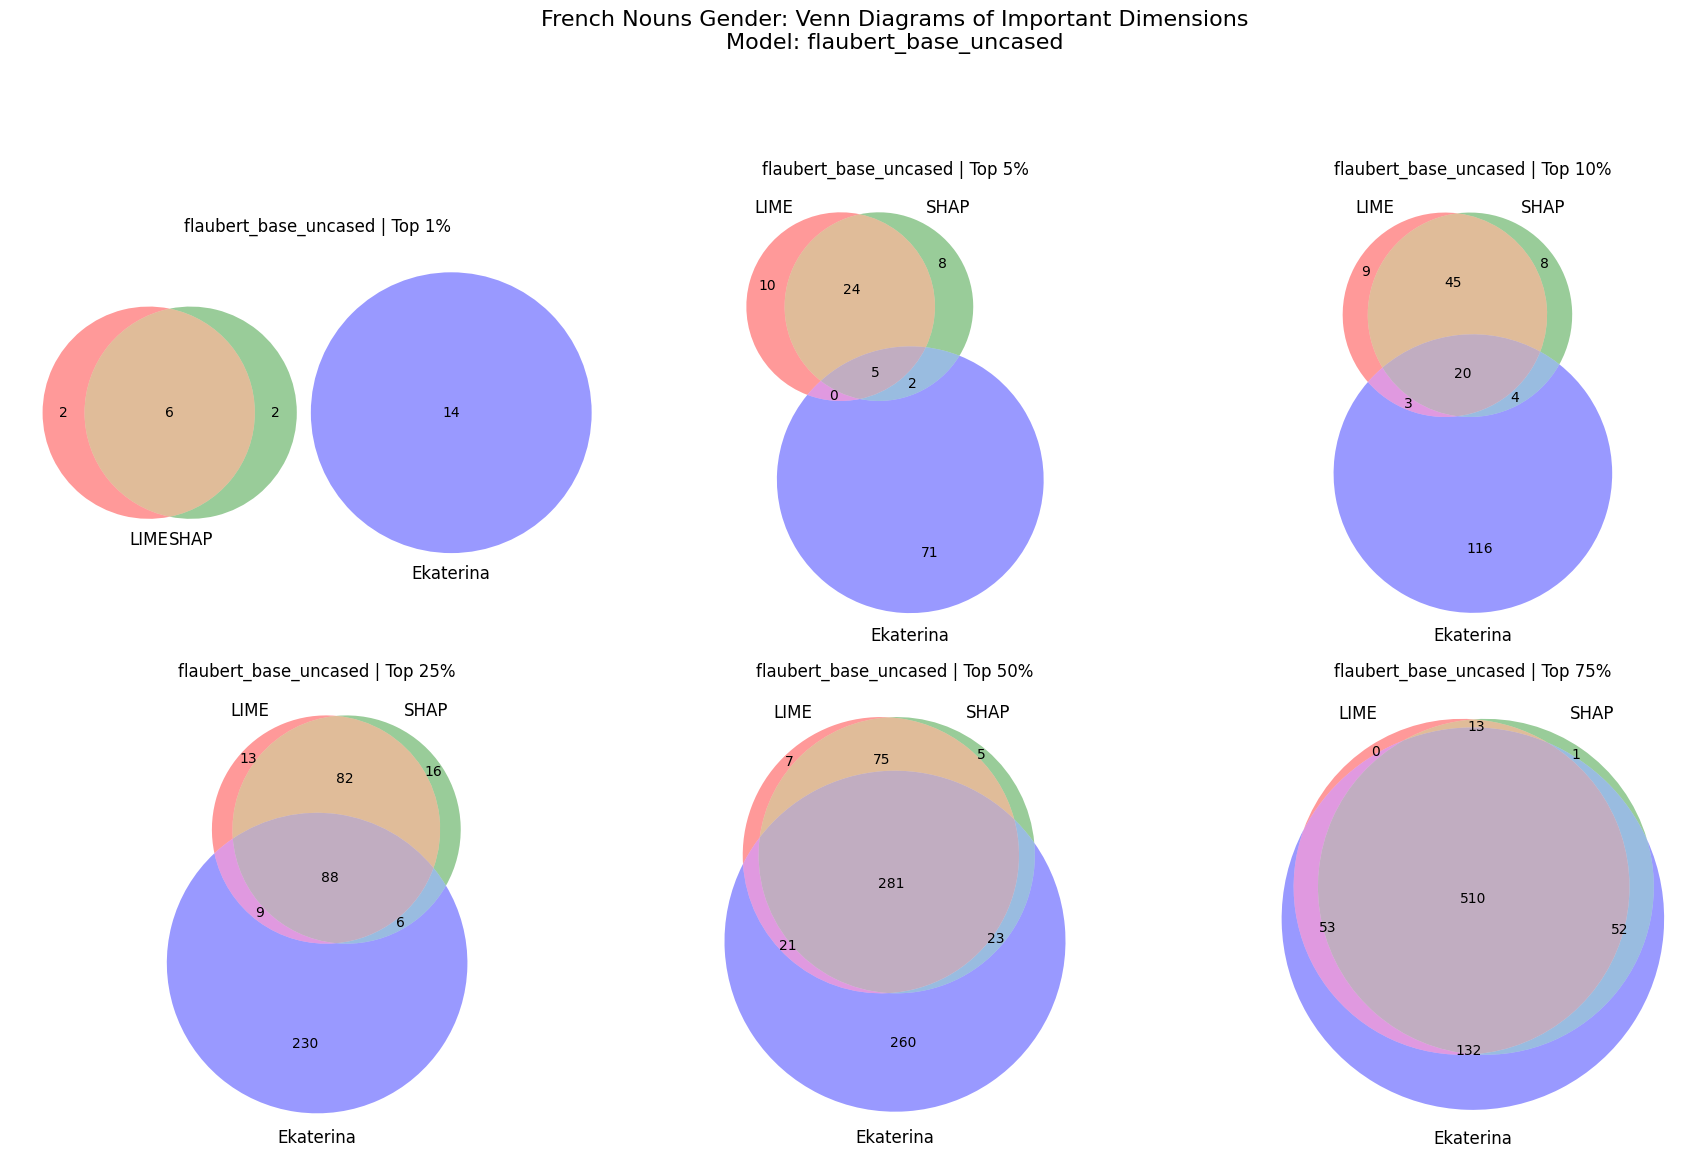


MODEL: flaubert_large_uncased


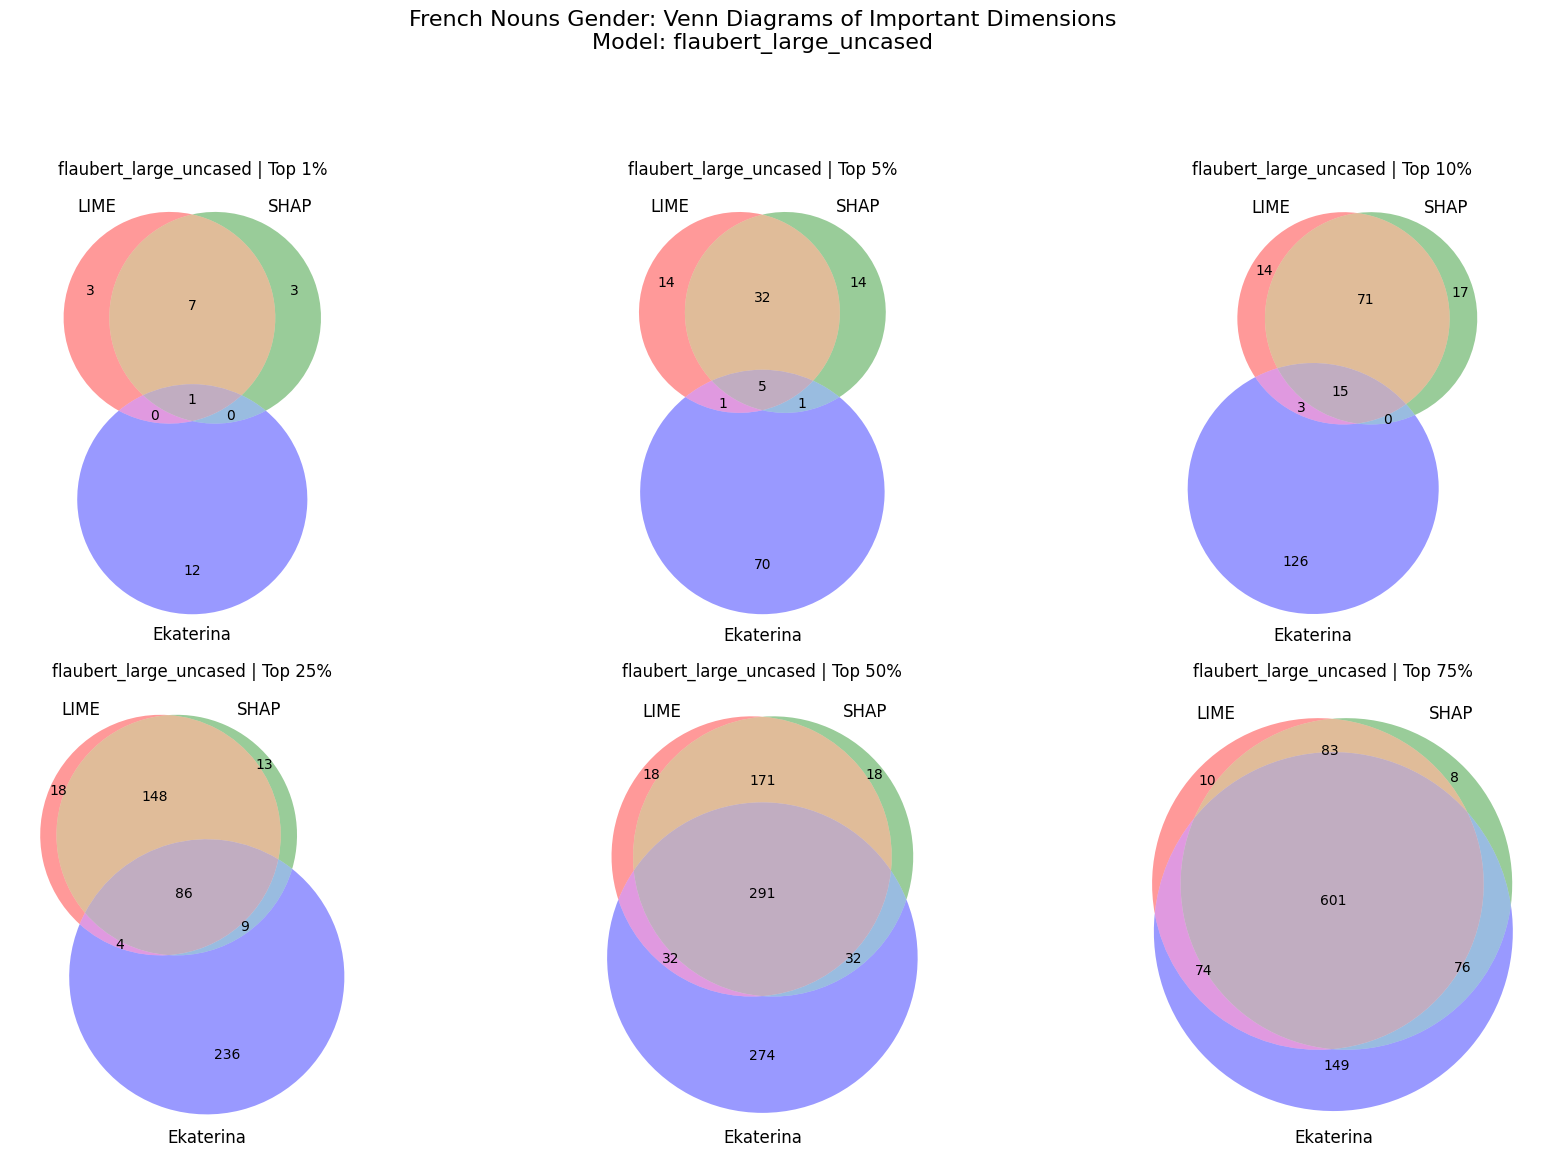

In [17]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import math

all_pretty_models = list(model_map.keys())   # ['flaubert_small_cased', ...]
topn_percs = [p for p in thresholds if p != 100]

for model_to_plot in all_pretty_models:
    print("\n" + "="*70)
    print(f"MODEL: {model_to_plot}")
    print("="*70)
    fig, axes = plt.subplots(2, 3, figsize=(18, 11))
    axes = axes.flatten()
    for i, topn_to_plot in enumerate(topn_percs):
        ax = axes[i]
        try:
            L_col = find_col(lime, model_to_plot)
            S_col = find_col(shap, model_to_plot)
            embed_dim = embed_size[model_to_plot]
            l_df = lime[["Feature", L_col]].copy()
            s_df = shap[["Feature", S_col]].copy()
            l_df["dim"] = l_df["Feature"].str.extract(r"(\d+)").astype(int)
            s_df["dim"] = s_df["Feature"].str.extract(r"(\d+)").astype(int)
            l_df["imp"] = pd.to_numeric(l_df[L_col], errors="coerce").fillna(0)
            s_df["imp"] = pd.to_numeric(s_df[S_col], errors="coerce").fillna(0)
            l_df = l_df.reindex(l_df["imp"].abs().sort_values(ascending=False).index)
            s_df = s_df.reindex(s_df["imp"].abs().sort_values(ascending=False).index)
            k = math.ceil(embed_dim * topn_to_plot / 100)
            L = set(l_df["dim"].iloc[:k])
            S = set(s_df["dim"].iloc[:k])
            E = ek_dims[model_to_plot][topn_to_plot]  # <-- use pretty name for ek_dims
            venn3([L, S, E], set_labels=("LIME", "SHAP", "Ekaterina"), ax=ax)

            ax.set_title(f"{model_to_plot} | Top {topn_to_plot}%", fontsize=12)
        except Exception as e:
            ax.axis('off')
            ax.text(0.5, 0.5, f"Error\n{e}", ha='center', va='center', fontsize=12)
    for j in range(len(topn_percs), 6):
        axes[j].axis('off')
    plt.suptitle(f"French Nouns Gender: Venn Diagrams of Important Dimensions\nModel: {model_to_plot}", fontsize=16, y=1.05)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


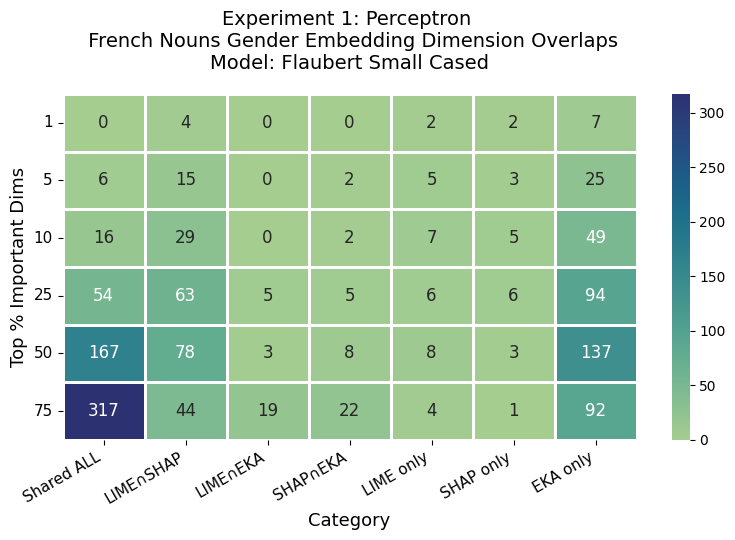

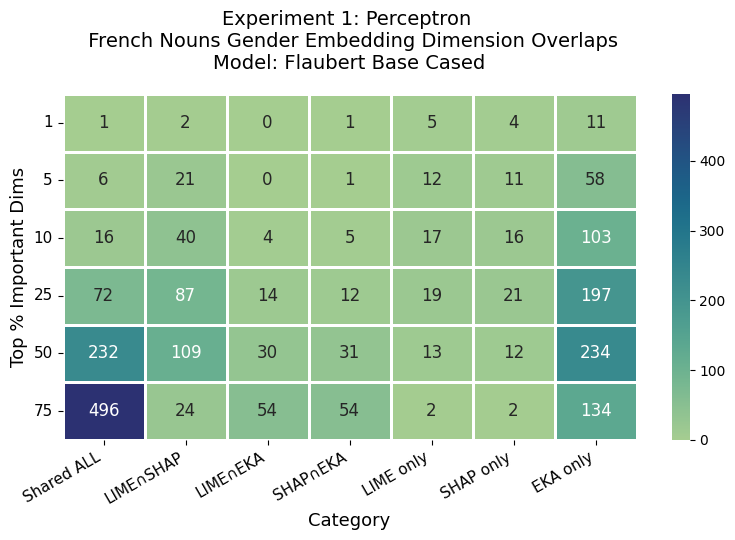

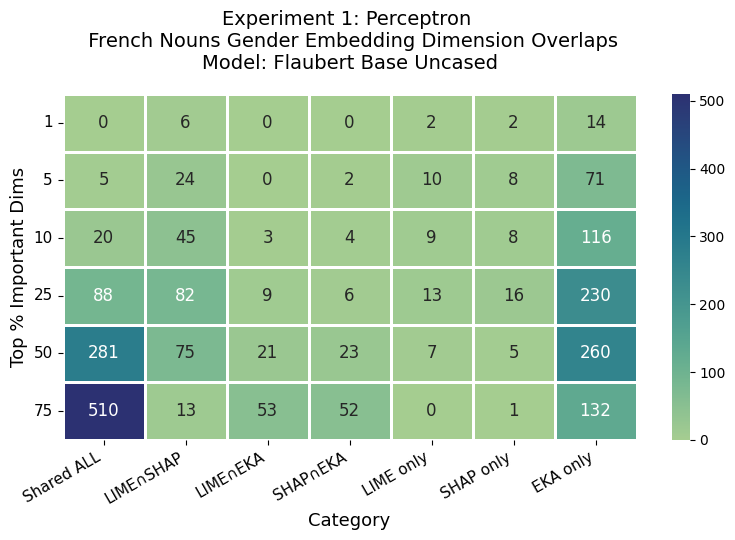

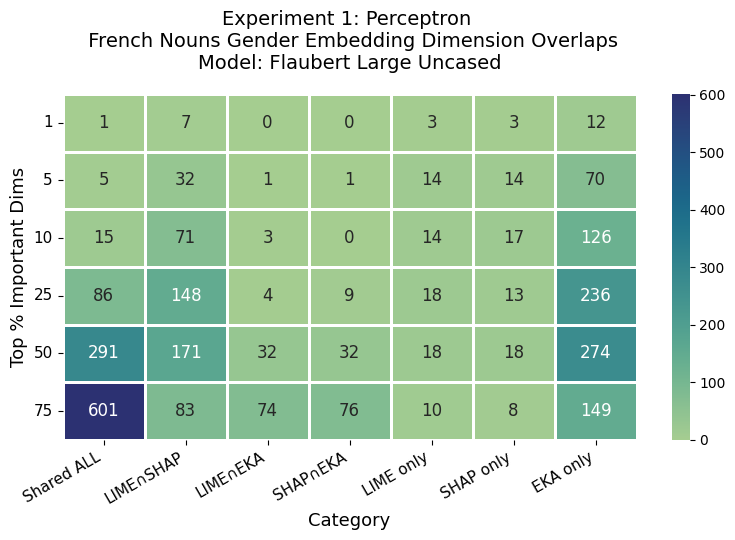

In [23]:
import pandas as pd

columns_order = [
    "Shared ALL", "LIME∩SHAP", "LIME∩EKA", "SHAP∩EKA",
    "LIME only", "SHAP only", "EKA only"
]

model_dfs = {}
for model in results:
    df = pd.DataFrame.from_dict(results[model], orient="index")
    df.index.name = "Top %"
    # Keep only the interesting columns, re-order if necessary
    df = df[columns_order]
    model_dfs[model] = df


import matplotlib.pyplot as plt
import seaborn as sns

for model, df in model_dfs.items():
    plt.figure(figsize=(8, 5.5))
    sns.heatmap(
        df, annot=True, fmt="d",
        cmap="crest",   # "YlGnBu", "crest", "BuPu", "Blues" are good options
        linewidths=1, linecolor='white',
        cbar=True,
        annot_kws={"size": 12}
    )
    plt.title(
        f"Experiment 1: Perceptron \n French Nouns Gender Embedding Dimension Overlaps\nModel: {model.replace('_', ' ').title()}",
        fontsize=14, pad=18
    )
    plt.xlabel("Category", fontsize=13)
    plt.ylabel("Top % Important Dims", fontsize=13)
    plt.xticks(rotation=30, ha="right", fontsize=11)
    plt.yticks(rotation=0, fontsize=11)
    plt.tight_layout()
    plt.show()
    print("\n\n")
